# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from plotly.subplots import make_subplots
import matplotlib.cm as cm
from scipy.stats import wasserstein_distance, energy_distance
print()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# Analyzing quantitive measures for the Template and Graphs of question 1

## loading the graphs into pandas dataframes

In [0]:
# csv files are read from the drive connected to the notebook
dfTemplate = pd.read_csv('drive/My Drive/data/CGCS-Template.csv')
dfGraph1 = pd.read_csv('drive/My Drive/data/Q1-Graph1.csv')
dfGraph2 = pd.read_csv('drive/My Drive/data/Q1-Graph2.csv')
dfGraph3 = pd.read_csv('drive/My Drive/data/Q1-Graph3.csv')
dfGraph4 = pd.read_csv('drive/My Drive/data/Q1-Graph4.csv')
dfGraph5 = pd.read_csv('drive/My Drive/data/Q1-Graph5.csv')
dfSeed1 = pd.read_csv('drive/My Drive/data/Seed1-Graph1.csv')
dfSeed2 = pd.read_csv('drive/My Drive/data/Seed2-Graph1.csv')
dfSeed3 = pd.read_csv('drive/My Drive/data/Seed3-Graph1.csv')

### Numerical data for question 1 graphs

#### Creating the graphs

In [0]:
# Creating empty Directed graphs for each of the graphs
templateG = nx.DiGraph()
graph1G = nx.DiGraph()
graph2G = nx.DiGraph()
graph3G = nx.DiGraph()
graph4G = nx.DiGraph()
graph5G = nx.DiGraph()
seed1G  = nx.DiGraph()
seed2G  = nx.DiGraph()
seed3G  = nx.DiGraph()

In [0]:
# Creating empty Directed graphs for each of the graphs
templateG = nx.Graph()
graph1G = nx.Graph()
graph2G = nx.Graph()
graph3G = nx.Graph()
graph4G = nx.Graph()
graph5G = nx.Graph()
seed1G  = nx.Graph()
seed2G  = nx.Graph()
seed3G  = nx.Graph()

In [0]:
# Creating empty Multi-way Directed graphs(repeated edges are considered) for each of the graphs
templateG = nx.MultiDiGraph()
graph1G = nx.MultiDiGraph()
graph2G = nx.MultiDiGraph()
graph3G = nx.MultiDiGraph()
graph4G = nx.MultiDiGraph()
graph5G = nx.MultiDiGraph()
seed1G = nx.MultiDiGraph()
seed2G = nx.MultiDiGraph()
seed3G = nx.MultiDiGraph()

In [0]:
# Putting the Source and Target values in tuples for each corresponding graph All channels
# for adding the edges into the graphs we first need to create a list of tuples of those edges
templateNodesTuple = [tuple([x, y]) for x, y in zip(dfTemplate["Source"], dfTemplate["Target"])]
graph1NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph1["Source"], dfGraph1["Target"])]
graph2NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph2["Source"], dfGraph2["Target"])]
graph3NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph3["Source"], dfGraph3["Target"])]
graph4NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph4["Source"], dfGraph4["Target"])]
graph5NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph5["Source"], dfGraph5["Target"])]
seed1NodesTuple = [tuple([x, y]) for x, y in zip(dfSeed1["Source"], dfSeed1["Target"])]
seed2NodesTuple = [tuple([x, y]) for x, y in zip(dfSeed2["Source"], dfSeed2["Target"])]
seed3NodesTuple = [tuple([x, y]) for x, y in zip(dfSeed3["Source"], dfSeed3["Target"])]

In [0]:
# Putting the Source and Target values in tuples for each corresponding graph All channels
# for adding the edges into the graphs we first need to create a list of tuples of those edges
# Time added as a weight
templateNodesTuple = [tuple([x, y, z]) for x, y, z in zip(dfTemplate["Source"], dfTemplate["Target"], dfTemplate["Time"])]
graph1NodesTuple = [tuple([x, y, z]) for x, y, z in zip(dfGraph1["Source"], dfGraph1["Target"], dfGraph1["Time"])]
graph2NodesTuple = [tuple([x, y, z]) for x, y, z in zip(dfGraph2["Source"], dfGraph2["Target"], dfGraph2["Time"])]
graph3NodesTuple = [tuple([x, y, z]) for x, y, z in zip(dfGraph3["Source"], dfGraph3["Target"], dfGraph3["Time"])]
graph4NodesTuple = [tuple([x, y, z]) for x, y, z in zip(dfGraph4["Source"], dfGraph4["Target"], dfGraph4["Time"])]
graph5NodesTuple = [tuple([x, y, z]) for x, y, z in zip(dfGraph5["Source"], dfGraph5["Target"], dfGraph5["Time"])]

In [0]:
# Putting the Source and Target values in tuples for each corresponding graph Communication channel
templateNodesTuple = [tuple([x, y]) for x, y in zip(dfTemplate[(dfTemplate["eType"] == 0) | (dfTemplate["eType"] == 1)]["Source"],
                      dfTemplate[(dfTemplate["eType"] == 0) | (dfTemplate["eType"] == 1)]["Target"])]
graph1NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph1[(dfGraph1["eType"] == 0) | (dfGraph1["eType"] == 1)]["Source"], 
                                                  dfGraph1[(dfGraph1["eType"] == 0) | (dfGraph1["eType"] == 1)]["Target"])]
graph2NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph2[(dfGraph2["eType"] == 0) | (dfGraph2["eType"] == 1)]["Source"], 
                                                  dfGraph2[(dfGraph2["eType"] == 0) | (dfGraph2["eType"] == 1)]["Target"])]
graph3NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph3[(dfGraph3["eType"] == 0) | (dfGraph3["eType"] == 1)]["Source"], 
                                                  dfGraph3[(dfGraph3["eType"] == 0) | (dfGraph3["eType"] == 1)]["Target"])]
graph4NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph4[(dfGraph4["eType"] == 0) | (dfGraph4["eType"] == 1)]["Source"], 
                                                  dfGraph4[(dfGraph4["eType"] == 0) | (dfGraph4["eType"] == 1)]["Target"])]
graph5NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph5[(dfGraph5["eType"] == 0) | (dfGraph5["eType"] == 1)]["Source"], 
                                                  dfGraph5[(dfGraph5["eType"] == 0) | (dfGraph5["eType"] == 1)]["Target"])]
graph5NodesTuple = [tuple([x, y]) for x, y in zip(dfSeed1[(dfSeed1["eType"] == 0) | (dfSeed1["eType"] == 1)]["Source"], 
                                                  dfSeed1[(dfSeed1["eType"] == 0) | (dfSeed1["eType"] == 1)]["Target"])]
graph5NodesTuple = [tuple([x, y]) for x, y in zip(dfSeed2[(dfSeed2["eType"] == 0) | (dfSeed2["eType"] == 1)]["Source"], 
                                                  dfSeed2[(dfSeed2["eType"] == 0) | (dfSeed2["eType"] == 1)]["Target"])]
graph5NodesTuple = [tuple([x, y]) for x, y in zip(dfSeed3[(dfSeed3["eType"] == 0) | (dfSeed3["eType"] == 1)]["Source"], 
                                                  dfSeed3[(dfSeed3["eType"] == 0) | (dfSeed3["eType"] == 1)]["Target"])]


In [83]:
# Creating graph objects from the tuples
templateG.add_edges_from(templateNodesTuple)
graph1G.add_edges_from(graph1NodesTuple)
graph2G.add_edges_from(graph2NodesTuple)
graph3G.add_edges_from(graph3NodesTuple)
graph4G.add_edges_from(graph4NodesTuple)
graph5G.add_edges_from(graph5NodesTuple)
seed1G.add_edges_from(seed1NodesTuple)
seed2G.add_edges_from(seed2NodesTuple)
seed3G.add_edges_from(seed3NodesTuple)
print("")

In [0]:
# Creating graph objects from the tuples 
# with a weight
templateG.add_weighted_edges_from(templateNodesTuple)
graph1G.add_weighted_edges_from(graph1NodesTuple)
graph2G.add_weighted_edges_from(graph2NodesTuple)
graph3G.add_weighted_edges_from(graph3NodesTuple)
graph4G.add_weighted_edges_from(graph4NodesTuple)
graph5G.add_weighted_edges_from(graph5NodesTuple)
print("")

##### Graph info

In [8]:
print(nx.info(templateG))

Name: 
Type: MultiDiGraph
Number of nodes: 88
Number of edges: 1325
Average in degree:  15.0568
Average out degree:  15.0568


In [9]:
print(nx.info(graph1G))

Name: 
Type: MultiDiGraph
Number of nodes: 93
Number of edges: 1216
Average in degree:  13.0753
Average out degree:  13.0753


In [10]:
print(nx.info(graph2G))

Name: 
Type: MultiDiGraph
Number of nodes: 87
Number of edges: 1300
Average in degree:  14.9425
Average out degree:  14.9425


In [11]:
print(nx.info(graph3G))

Name: 
Type: MultiDiGraph
Number of nodes: 79
Number of edges: 729
Average in degree:   9.2278
Average out degree:   9.2278


In [12]:
print(nx.info(graph4G))

Name: 
Type: MultiDiGraph
Number of nodes: 87
Number of edges: 732
Average in degree:   8.4138
Average out degree:   8.4138


In [13]:
print(nx.info(graph5G))

Name: 
Type: MultiDiGraph
Number of nodes: 86
Number of edges: 395
Average in degree:   4.5930
Average out degree:   4.5930


In [14]:
print(nx.info(seed1G))

Name: 
Type: MultiDiGraph
Number of nodes: 44
Number of edges: 498
Average in degree:  11.3182
Average out degree:  11.3182


In [15]:
print(nx.info(seed2G))

Name: 
Type: MultiDiGraph
Number of nodes: 96
Number of edges: 333
Average in degree:   3.4688
Average out degree:   3.4688


In [16]:
print(nx.info(seed3G))

Name: 
Type: MultiDiGraph
Number of nodes: 53
Number of edges: 379
Average in degree:   7.1509
Average out degree:   7.1509


In [0]:
testG = nx.MultiDiGraph()

In [0]:
templateNodesTuple[1:20]

In [0]:
templateNodesTuple = [tuple([x, y, z]) for x, y, z in zip(dfTemplate["Source"], dfTemplate["Target"], dfTemplate["Time"])]

In [0]:
zip(range(5), range(6), range(2))

In [0]:
max([x for x, y, z in zip(dfTemplate["Source"], dfTemplate["Target"], dfTemplate["Time"])])

620120

In [0]:
a = [testG.add_edge(x, y,time = z) for x, y, z in zip(dfTemplate["Source"], dfTemplate["Target"], dfTemplate["Time"])]

In [0]:
print(min([x for y, x in list(testG.in_degree())]),
      max([x for y, x in list(testG.in_degree())]))

0 72


In [0]:
testG.degree()

DiMultiDegreeView({0: 38, -99: 1, 41: 208, 34: 93, 37: 102, 27: 98, 40: 55, 39: 116, 65: 56, 67: 54, 47: 105, 66: 5, 657187: 18, 78: 4, 81: 7, 80: 4, 70: 13, 43: 74, 56: 85, 57: 64, 58: 95, 63: 120, 77: 4, 79: 4, 45: 76, 69: 10, 76: 7, 82: 1, 83: 1, 84: 1, 73: 3, 75: 3, 74: 3, 71: 9, 72: 6, 87: 4, 85: 4, 86: 4, 2: 24, 630626: 24, 536346: 13, 510031: 18, 520660: 10, 552988: 36, 567195: 30, 527449: 36, 459381: 36, 595298: 36, 466907: 33, 589943: 27, 577992: 19, 537281: 22, 523927: 28, 580426: 24, 595581: 23, 642329: 25, 503701: 33, 571970: 25, 644226: 13, 632961: 26, 473173: 36, 620120: 36, 621924: 23, 616315: 25, 29: 21, 575030: 26, 31: 23, 503218: 4, 33: 21, 35: 17, 36: 20, 38: 19, 42: 18, 44: 17, 46: 21, 48: 17, 49: 26, 640784: 1, 606730: 3, 52: 20, 53: 16, 54: 19, 55: 14, 59: 16, 60: 17, 61: 20, 62: 19, 64: 19})

In [0]:
graph1G.degree()

DiMultiDegreeView({599956: 74, 635665: 115, 490041: 55, 589639: 35, 533140: 20, 591682: 6, 568093: 12, 616050: 15, 632150: 16, 464459: 9, 512397: 19, 550287: 12, 559657: 5, 623295: 54, 492777: 59, 570411: 20, 550361: 35, 493044: 24, 596193: 30, 640464: 21})

In [0]:
testG2 = nx.MultiDiGraph()
testTuple = [tuple([x, y]) for x, y in zip(dfTemplate["Source"], dfTemplate["Target"])]

In [0]:
a = testG2.add_edges_from(testTuple)

In [0]:
print(min([x for y, x in list(testG2.in_degree())]),
      max([x for y, x in list(testG2.in_degree())]))

0 72


In [0]:
np.size(a,0)

86

#### heatmap

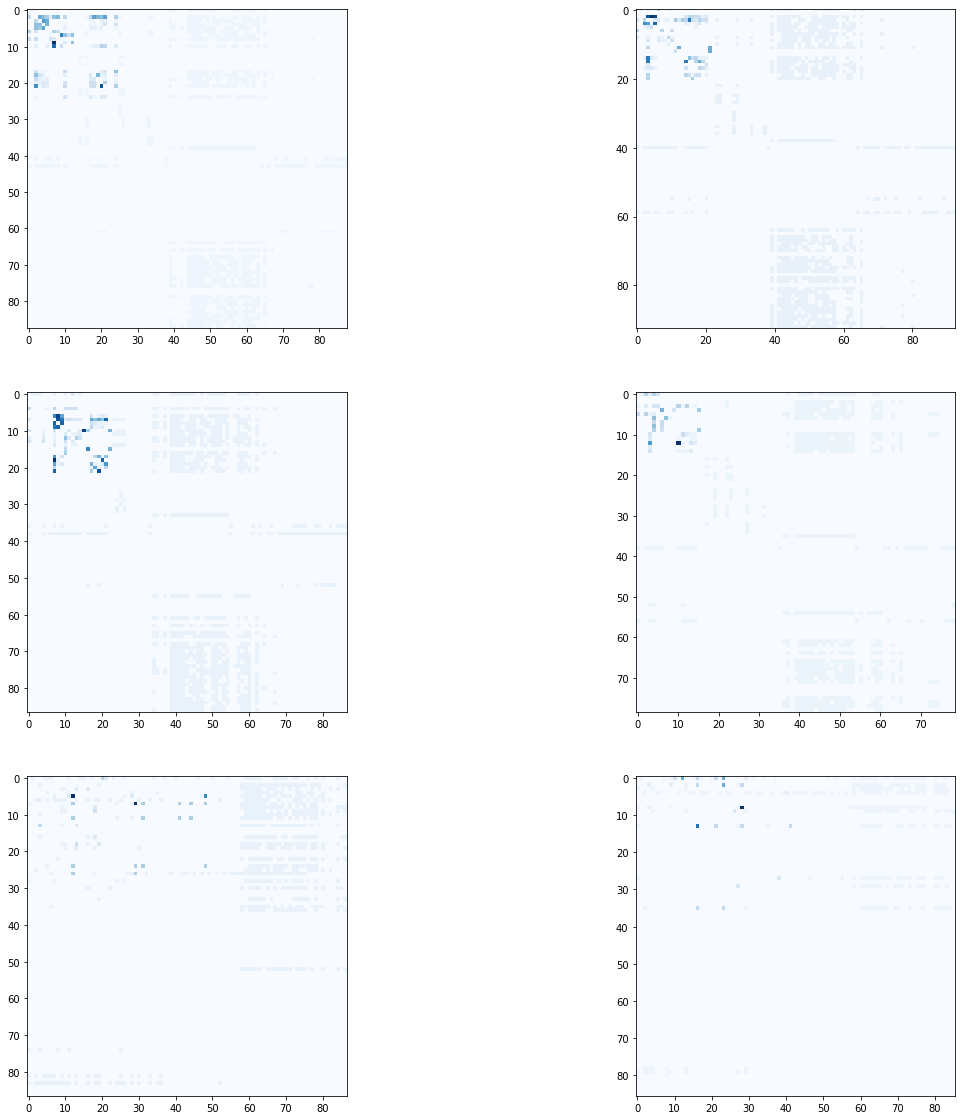

In [0]:
# nx.to_numpy_matrix(graph1G)


# Make an array with ones in the shape of an 'X'

fig = plt.figure(figsize=(20, 20)) 

a = nx.to_numpy_matrix(templateG)
ax1 = fig.add_subplot(321)
ax1.imshow(a, interpolation=None, cmap=cm.Blues)

a = nx.to_numpy_matrix(graph1G)
ax1 = fig.add_subplot(322)
ax1.imshow(a, interpolation=None, cmap=cm.Blues)

a = nx.to_numpy_matrix(graph2G)
ax1 = fig.add_subplot(323)
ax1.imshow(a, interpolation=None, cmap=cm.Blues)

a = nx.to_numpy_matrix(graph3G)
ax1 = fig.add_subplot(324)
ax1.imshow(a, interpolation=None, cmap=cm.Blues)

a = nx.to_numpy_matrix(graph4G)
ax1 = fig.add_subplot(325)
ax1.imshow(a, interpolation=None, cmap=cm.Blues)

a = nx.to_numpy_matrix(graph5G)
ax1 = fig.add_subplot(326)
ax1.imshow(a, interpolation=None, cmap=cm.Blues)


plt.show()

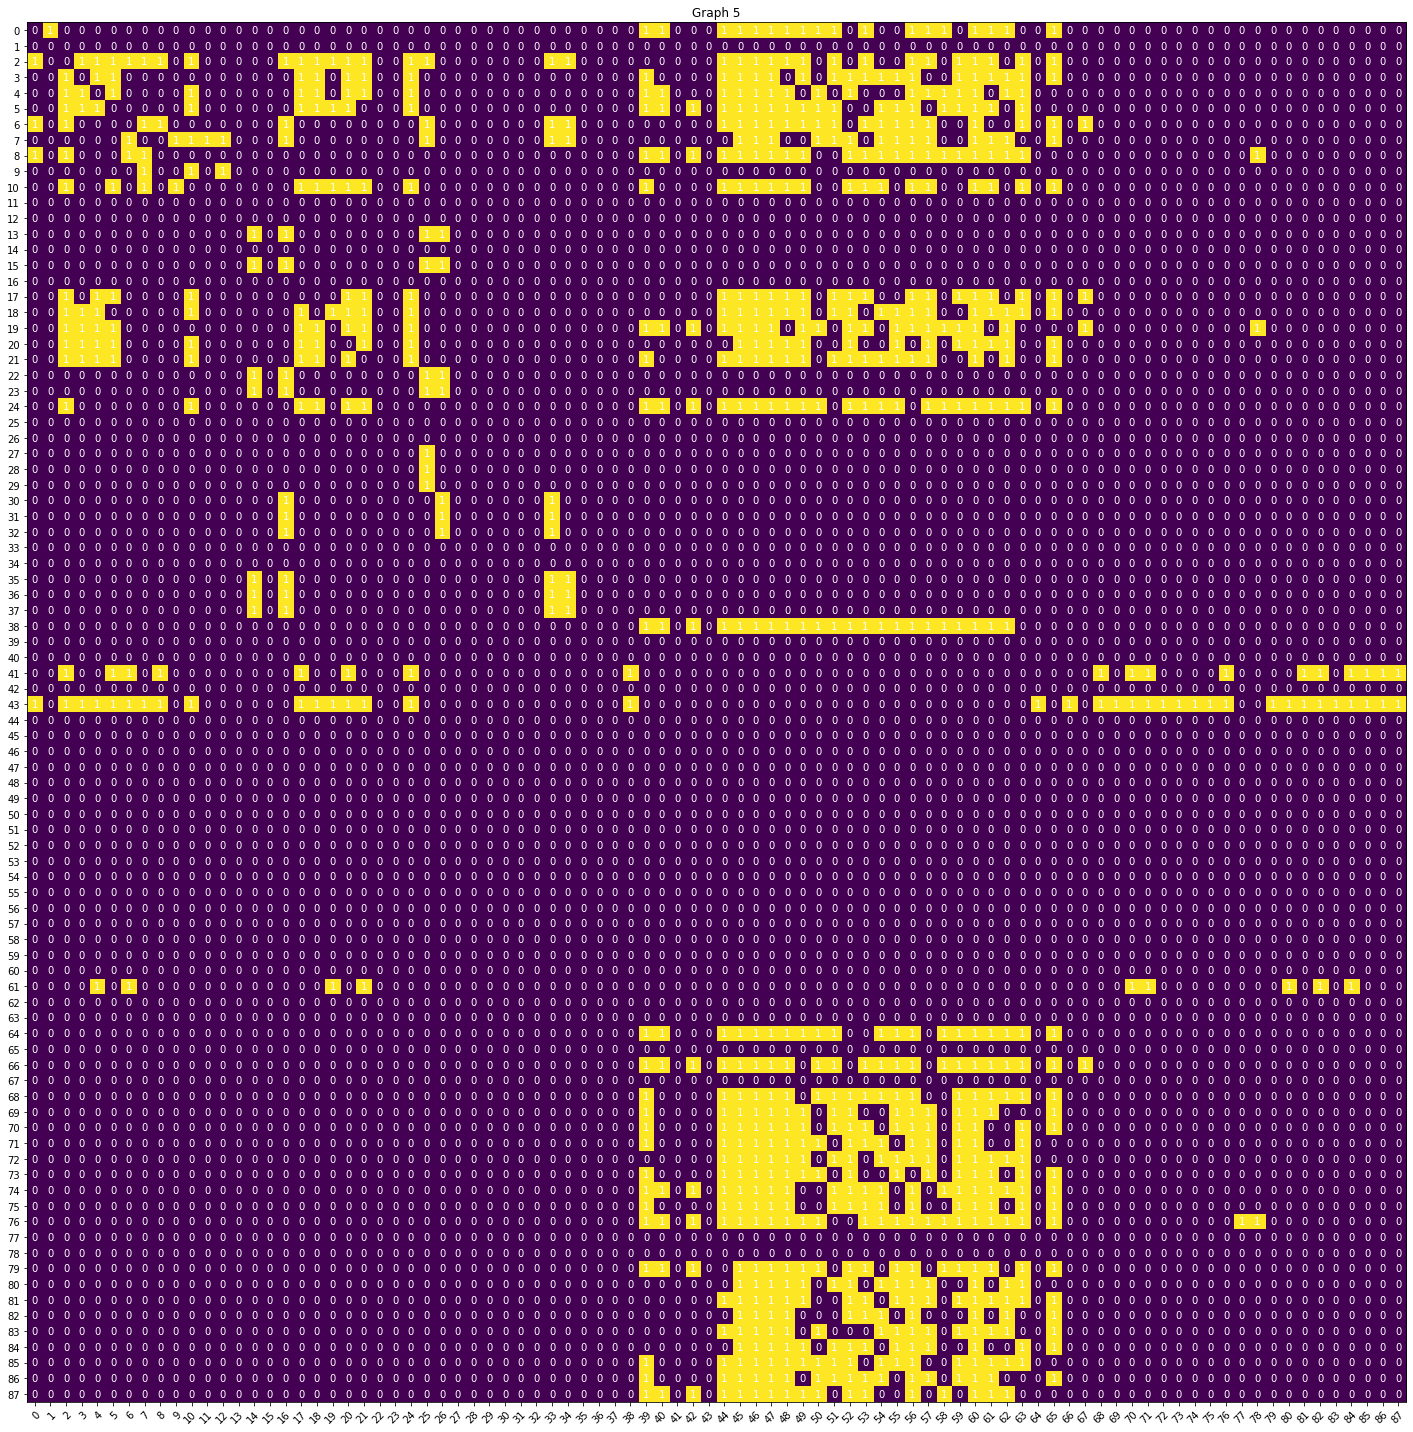

In [0]:
#fig = plt.figure(figsize=(20, 20)) 
a = nx.to_numpy_matrix(templateG)

fig, ax = plt.subplots(1, 1, figsize=(20, 20))
im = ax.imshow(a)

# We want to show all ticks...
ax.set_xticks(np.arange(np.size(a, 0)))
ax.set_yticks(np.arange(np.size(a, 1)))
# ... and label them with the respective list entries
#ax.set_xticklabels(np.matrix(graph1G.nodes()))
#ax.set_yticklabels(np.matrix(graph1G.nodes()))

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(np.size(a, 0)):
    for j in range(np.size(a, 1)):
        text = ax.text(j, i, int(a[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Graph 5")
fig.tight_layout()
plt.show()


In [0]:
np.matrix(graph1G.nodes())

matrix([[616050, 590502, 599956, 635665, 490041, 589639, 533140, 591682,
         568093, 632150, 464459, 512397, 550287, 559657, 623295, 492777,
         570411, 550361, 493044, 596193, 640464, 657187, 629627, 625756,
         657173, 599441, 534034, 585212, 509607, 499467, 538892, 542965,
         572391, 561157, 649553, 570284, 643925, 616453, 608827, 630626,
         552988, 567195, 527449, 459381, 595298, 466907, 589943, 537281,
         580426, 595581, 616315, 642329, 503701, 632961, 473173, 620120,
         575030, 621924, 536346, 510031, 520660, 577992, 571970, 644226,
         530528, 523927, 635706, 554431, 566342, 548513, 599057, 640784,
         474199, 475130, 576641, 463777, 654763, 503218, 529922, 599063,
         606730, 622296, 592414, 575704, 654981, 575859, 505722, 517273,
         492286, 636961, 629717, 502591, 569820]])

#### degree

In [0]:
degreeTemplate = nx.degree(templateG)
degreeGraph1 = nx.degree(graph1G)
degreeGraph2 = nx.degree(graph2G)
degreeGraph3 = nx.degree(graph3G)
degreeGraph4 = nx.degree(graph4G)
degreeGraph5 = nx.degree(graph5G)
degreeSeed1 = nx.degree(seed1G)
degreeSeed2 = nx.degree(seed2G)
degreeSeed3 = nx.degree(seed3G)

In [54]:
print(dict((x, y) for x, y in degreeTemplate))

{0: 38, -99: 1, 41: 208, 34: 93, 37: 102, 27: 98, 40: 55, 39: 116, 65: 56, 67: 54, 47: 105, 66: 5, 657187: 18, 78: 4, 81: 7, 80: 4, 70: 13, 43: 74, 56: 85, 57: 64, 58: 95, 63: 120, 77: 4, 79: 4, 45: 76, 69: 10, 76: 7, 82: 1, 83: 1, 84: 1, 73: 3, 75: 3, 74: 3, 71: 9, 72: 6, 87: 4, 85: 4, 86: 4, 2: 24, 630626: 24, 536346: 13, 510031: 18, 520660: 10, 552988: 36, 567195: 30, 527449: 36, 459381: 36, 595298: 36, 466907: 33, 589943: 27, 577992: 19, 537281: 22, 523927: 28, 580426: 24, 595581: 23, 642329: 25, 503701: 33, 571970: 25, 644226: 13, 632961: 26, 473173: 36, 620120: 36, 621924: 23, 616315: 25, 29: 21, 575030: 26, 31: 23, 503218: 4, 33: 21, 35: 17, 36: 20, 38: 19, 42: 18, 44: 17, 46: 21, 48: 17, 49: 26, 640784: 1, 606730: 3, 52: 20, 53: 16, 54: 19, 55: 14, 59: 16, 60: 17, 61: 20, 62: 19, 64: 19}


In [19]:
print("degre erange for All channel in Template: ",
      min(list(dict((x, y) for x, y in degreeTemplate).values())), 
      max(list(dict((x, y) for x, y in degreeTemplate).values())))

print("degree range for All channel in graph 1: ",
      min(list(dict((x, y) for x, y in degreeGraph1).values())), 
      max(list(dict((x, y) for x, y in degreeGraph1).values())))

print("degree range for All channel in graph 2: ",
      min(list(dict((x, y) for x, y in degreeGraph2).values())), 
      max(list(dict((x, y) for x, y in degreeGraph2).values())))

print("degree range for All channel in graph 3: ",
      min(list(dict((x, y) for x, y in degreeGraph3).values())), 
      max(list(dict((x, y) for x, y in degreeGraph3).values())))

print("degree range for All channel in graph 4: ",
      min(list(dict((x, y) for x, y in degreeGraph4).values())), 
      max(list(dict((x, y) for x, y in degreeGraph4).values())))

print("degree range for All channel in graph 5: ",
      min(list(dict((x, y) for x, y in degreeGraph5).values())), 
      max(list(dict((x, y) for x, y in degreeGraph5).values())))

print("degree range for All channel in graph seed 1: ",
      min(list(dict((x, y) for x, y in degreeSeed1).values())), 
      max(list(dict((x, y) for x, y in degreeSeed1).values())))

print("degree range for All channel in graph seed 2: ",
      min(list(dict((x, y) for x, y in degreeSeed2).values())), 
      max(list(dict((x, y) for x, y in degreeSeed2).values())))

print("degree range for All channel in graph seed 3: ",
      min(list(dict((x, y) for x, y in degreeSeed3).values())), 
      max(list(dict((x, y) for x, y in degreeSeed3).values())))

degre erange for All channel in Template:  1 208
degree range for All channel in graph 1:  1 135
degree range for All channel in graph 2:  1 192
degree range for All channel in graph 3:  1 68
degree range for All channel in graph 4:  1 64
degree range for All channel in graph 5:  1 72
degree range for All channel in graph seed 1:  2 235
degree range for All channel in graph seed 2:  3 86
degree range for All channel in graph seed 3:  2 111


In [55]:
print("wasserstein distance between Template and Graph 1 is: ", 
      wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph1).values())))
print("wasserstein distance between Template and Graph 2 is: ", 
      wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph2).values())))
print("wasserstein distance between Template and Graph 3 is: ", 
      wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph3).values())))
print("wasserstein distance between Template and Graph 4 is: ", 
      wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph4).values())))
print("wasserstein distance between Template and Graph 5 is: ", 
      wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph5).values())))

wasserstein distance between Template and Graph 1 is:  7.1842619745845555
wasserstein distance between Template and Graph 2 is:  6.195402298850573
wasserstein distance between Template and Graph 3 is:  11.695627157652472
wasserstein distance between Template and Graph 4 is:  13.286050156739813
wasserstein distance between Template and Graph 5 is:  20.927589852008456


In [56]:
print("energy distance between Template and Graph 1 is: ", 
      energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph1).values())))
print("energy distance between Template and Graph 2 is: ", 
      energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph2).values())))
print("energy distance between Template and Graph 3 is: ", 
      energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph3).values())))
print("energy distance between Template and Graph 4 is: ", 
      energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph4).values())))
print("energy distance between Template and Graph 5 is: ", 
      energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph5).values())))

energy distance between Template and Graph 1 is:  0.9449901739547659
energy distance between Template and Graph 2 is:  0.8819670123359101
energy distance between Template and Graph 3 is:  1.5063131251233817
energy distance between Template and Graph 4 is:  1.7165955875838506
energy distance between Template and Graph 5 is:  3.402014797571818


In [0]:
fig = make_subplots(rows=5, cols=2)

# autobinx=True

df = pd.DataFrame(list(zip([y for x, y in degreeTemplate], [x for x, y in degreeTemplate])))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in degreeGraph1], [x for x, y in degreeGraph1])))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in degreeGraph2], [x for x, y in degreeGraph2])))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in degreeGraph3], [x for x, y in degreeGraph3])))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in degreeGraph4], [x for x, y in degreeGraph4])))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in degreeGraph5], [x for x, y in degreeGraph5])))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in degreeSeed1], [x for x, y in degreeSeed1])))
x = df[0]
trace6 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in degreeSeed2], [x for x, y in degreeSeed2])))
x = df[0]
trace7 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in degreeSeed3], [x for x, y in degreeSeed3])))
x = df[0]
trace8 = go.Histogram(x=x, nbinsx=12)


fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)
fig.append_trace(trace6, 4, 1)
fig.append_trace(trace7, 4, 2)
fig.append_trace(trace8, 5, 1)

fig.update_layout(height=1600, width=1600, title_text="Stacked Subplots")

fig.update_layout(barmode='overlay')
fig.show()

In [75]:
measureTemplate = list(dict((x, y) for x, y in degreeTemplate).values())
measureGraph1 = list(dict((x, y) for x, y in degreeGraph1).values())
measureGraph2 = list(dict((x, y) for x, y in degreeGraph2).values())
measureGraph3 = list(dict((x, y) for x, y in degreeGraph3).values())
measureGraph4 = list(dict((x, y) for x, y in degreeGraph4).values())
measureGraph5 = list(dict((x, y) for x, y in degreeGraph5).values())
measureSeed1 = list(dict((x, y) for x, y in degreeSeed1).values())
measureSeed2 = list(dict((x, y) for x, y in degreeSeed2).values())
measureSeed3 = list(dict((x, y) for x, y in degreeSeed3).values())




fig = go.Figure()



fig.add_trace(go.Box(
    y=measureTemplate,
    name="Template",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph1,
    name="Graph 1",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph2,
    name="Graph 2",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph3,
    name="Graph 3",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph4,
    name="Graph 4",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph5,
    name="Graph 5",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))



fig.update_layout(title_text="Box Plot for degree")
fig.show()





fig = go.Figure()


fig.add_trace(go.Box(
    y=measureTemplate,
    name="Template",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureSeed1,
    name="Seed1",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureSeed2,
    name="Seed 2",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureSeed3,
    name="Seed3",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))
fig.update_layout(title_text="Box Plot for degree")
fig.show()



In [0]:
import plotly.figure_factory as ff
import numpy as np

# Add histogram data
df = pd.DataFrame(list(zip([y for x, y in degreeTemplate], [x for x, y in degreeTemplate])))
x1 = df[0]

df = pd.DataFrame(list(zip([y for x, y in degreeGraph1], [x for x, y in degreeGraph1])))
x2 = df[0]

df = pd.DataFrame(list(zip([y for x, y in degreeGraph2], [x for x, y in degreeGraph2])))
x3 = df[0]

df = pd.DataFrame(list(zip([y for x, y in degreeGraph3], [x for x, y in degreeGraph3])))
x4 = df[0]

df = pd.DataFrame(list(zip([y for x, y in degreeGraph4], [x for x, y in degreeGraph4])))
x5 = df[0]

df = pd.DataFrame(list(zip([y for x, y in degreeGraph5], [x for x, y in degreeGraph5])))
x6 = df[0]

df = pd.DataFrame(list(zip([y for x, y in degreeSeed1], [x for x, y in degreeSeed1])))
x7 = df[0]

df = pd.DataFrame(list(zip([y for x, y in degreeSeed2], [x for x, y in degreeSeed2])))
x8 = df[0]

df = pd.DataFrame(list(zip([y for x, y in degreeSeed3], [x for x, y in degreeSeed3])))
x9 = df[0]

# Group data together
hist_data = [x1, x2, x3, x4, x5, x6, x7, x8, x9]

group_labels = ['Template', 'Graph 1', 'Graph 2', 'Graph 3', 'Graph 4','Graph 5', 'Seed 1', 'Seed 2', 'Seed 3']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=4, show_hist=False)
fig.show()

In [0]:
import plotly.express as px

fig = px.histogram(dfTemplate, x="Time", y="Source", color="eType",
                   marginal="box", # or violin, rug
                   hover_data=dfTemplate.columns)
fig.show()

In [0]:
fig = px.histogram(dfSeed3, x="Time", y="Source", color="eType",
                   marginal="box", # or violin, rug
                   hover_data=dfTemplate.columns)
fig.show()

In [0]:

fig = go.Figure()

df = pd.DataFrame(list(zip([y for x, y in degreeTemplate], [x for x, y in degreeTemplate])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in degreeGraph1], [x for x, y in degreeGraph1])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in degreeGraph2], [x for x, y in degreeGraph2])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in degreeGraph3], [x for x, y in degreeGraph3])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in degreeGraph4], [x for x, y in degreeGraph4])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in degreeGraph5], [x for x, y in degreeGraph5])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))




# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

#### sort the data

In [0]:
centrality = sorted(nx.degree_centrality(graph1G).items(), key=lambda e: e[1], reverse=True)
print(centrality)

[(635665, 1.467391304347826), (599956, 1.0326086956521738), (492777, 0.8369565217391304), (490041, 0.8260869565217391), (623295, 0.7608695652173912), (589639, 0.6195652173913043), (550361, 0.5978260869565217), (512397, 0.5434782608695652), (596193, 0.5), (493044, 0.4891304347826087), (552988, 0.4782608695652174), (527449, 0.4782608695652174), (459381, 0.4782608695652174), (595298, 0.4782608695652174), (473173, 0.4782608695652174), (620120, 0.4782608695652174), (570411, 0.43478260869565216), (640464, 0.43478260869565216), (533140, 0.40217391304347827), (503701, 0.40217391304347827), (567195, 0.3913043478260869), (466907, 0.3913043478260869), (616050, 0.3804347826086956), (621924, 0.3804347826086956), (589943, 0.358695652173913), (595581, 0.358695652173913), (632150, 0.34782608695652173), (630626, 0.33695652173913043), (523927, 0.33695652173913043), (568093, 0.32608695652173914), (464459, 0.32608695652173914), (580426, 0.32608695652173914), (537281, 0.31521739130434784), (632961, 0.31521

In [0]:
sorted(nx.assortativity.average_neighbor_degree(graph).items(),key=lambda e: e[1], reverse=True

#### save for Gephi

In [0]:
nx.write_graphml(graph, “…/graph.graphml”)

#### in-degree

In [0]:
inDegreeTemplate = templateG.in_degree()
inDegreeGraph1 = graph1G.in_degree()
inDegreeGraph2 = graph2G.in_degree()
inDegreeGraph3 = graph3G.in_degree()
inDegreeGraph4 = graph4G.in_degree()
inDegreeGraph5 = graph5G.in_degree()

In [0]:
print(dict((x, y) for x, y in inDegreeTemplate))

{0: 19, -99: 0, 41: 136, 34: 55, 37: 56, 27: 58, 40: 44, 39: 57, 65: 39, 67: 34, 47: 63, 66: 0, 657187: 0, 78: 4, 81: 0, 80: 4, 70: 0, 43: 43, 56: 53, 57: 39, 58: 45, 63: 77, 77: 4, 79: 4, 45: 37, 69: 0, 76: 0, 82: 1, 83: 1, 84: 1, 73: 3, 75: 3, 74: 3, 71: 0, 72: 0, 87: 4, 85: 4, 86: 4, 2: 22, 630626: 0, 536346: 0, 510031: 18, 520660: 0, 552988: 36, 567195: 0, 527449: 0, 459381: 0, 595298: 0, 466907: 0, 589943: 0, 577992: 0, 537281: 0, 523927: 0, 580426: 0, 595581: 0, 642329: 0, 503701: 0, 571970: 0, 644226: 0, 632961: 0, 473173: 0, 620120: 9, 621924: 0, 616315: 0, 29: 20, 575030: 0, 31: 22, 503218: 0, 33: 19, 35: 16, 36: 17, 38: 16, 42: 17, 44: 16, 46: 20, 48: 16, 49: 24, 640784: 0, 606730: 0, 52: 19, 53: 14, 54: 17, 55: 11, 59: 15, 60: 14, 61: 18, 62: 17, 64: 17}


In [0]:
print("in degree range for All channel in Template: ",
      min(list(dict((x, y) for x, y in inDegreeTemplate).values())), 
      max(list(dict((x, y) for x, y in inDegreeTemplate).values())))

print("in degree range for All channel in graph 1: ",
      min(list(dict((x, y) for x, y in inDegreeGraph1).values())), 
      max(list(dict((x, y) for x, y in inDegreeGraph1).values())))

print("in degree range for All channel in graph 2: ",
      min(list(dict((x, y) for x, y in inDegreeGraph2).values())), 
      max(list(dict((x, y) for x, y in inDegreeGraph2).values())))

print("in degree range for All channel in graph 3: ",
      min(list(dict((x, y) for x, y in inDegreeGraph3).values())), 
      max(list(dict((x, y) for x, y in inDegreeGraph3).values())))

print("in degree range for All channel in graph 4: ",
      min(list(dict((x, y) for x, y in inDegreeGraph4).values())), 
      max(list(dict((x, y) for x, y in inDegreeGraph4).values())))

print("in degree range for All channel in graph 5: ",
      min(list(dict((x, y) for x, y in inDegreeGraph5).values())), 
      max(list(dict((x, y) for x, y in inDegreeGraph5).values())))

in degree range for All channel in Template:  0 72
in degree range for All channel in graph 1:  0 64
in degree range for All channel in graph 2:  0 96
in degree range for All channel in graph 3:  0 36
in degree range for All channel in graph 4:  0 35
in degree range for All channel in graph 5:  0 30


In [0]:
fig = make_subplots(rows=3, cols=2)

# autobinx=True

df = pd.DataFrame(list(zip([y for x, y in degreeTemplate], [x for x, y in degreeTemplate])))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in inDegreeGraph1], [x for x, y in inDegreeGraph1])))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in inDegreeGraph2], [x for x, y in inDegreeGraph2])))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in inDegreeGraph3], [x for x, y in inDegreeGraph3])))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in inDegreeGraph4], [x for x, y in inDegreeGraph4])))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in inDegreeGraph5], [x for x, y in inDegreeGraph5])))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=12)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)

fig.update_layout(barmode='overlay')
fig.show()

In [0]:

fig = go.Figure()

df = pd.DataFrame(list(zip([y for x, y in degreeTemplate], [x for x, y in degreeTemplate])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in inDegreeGraph1], [x for x, y in inDegreeGraph1])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in inDegreeGraph2], [x for x, y in inDegreeGraph2])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in inDegreeGraph3], [x for x, y in inDegreeGraph3])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in inDegreeGraph4], [x for x, y in inDegreeGraph4])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in inDegreeGraph5], [x for x, y in inDegreeGraph5])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))


# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

#### out-degree

In [0]:
outDegreeTemplate = templateG.out_degree()
outDegreeGraph1 = graph1G.out_degree()
outDegreeGraph2 = graph2G.out_degree()
outDegreeGraph3 = graph3G.out_degree()
outDegreeGraph4 = graph4G.out_degree()
outDegreeGraph5 = graph5G.out_degree()

In [0]:
print(dict((x, y) for x, y in outDegreeTemplate))

{0: 19, -99: 0, 41: 136, 34: 55, 37: 56, 27: 58, 40: 44, 39: 57, 65: 39, 67: 34, 47: 63, 66: 0, 657187: 0, 78: 4, 81: 0, 80: 4, 70: 0, 43: 43, 56: 53, 57: 39, 58: 45, 63: 77, 77: 4, 79: 4, 45: 37, 69: 0, 76: 0, 82: 1, 83: 1, 84: 1, 73: 3, 75: 3, 74: 3, 71: 0, 72: 0, 87: 4, 85: 4, 86: 4, 2: 22, 630626: 0, 536346: 0, 510031: 18, 520660: 0, 552988: 36, 567195: 0, 527449: 0, 459381: 0, 595298: 0, 466907: 0, 589943: 0, 577992: 0, 537281: 0, 523927: 0, 580426: 0, 595581: 0, 642329: 0, 503701: 0, 571970: 0, 644226: 0, 632961: 0, 473173: 0, 620120: 9, 621924: 0, 616315: 0, 29: 20, 575030: 0, 31: 22, 503218: 0, 33: 19, 35: 16, 36: 17, 38: 16, 42: 17, 44: 16, 46: 20, 48: 16, 49: 24, 640784: 0, 606730: 0, 52: 19, 53: 14, 54: 17, 55: 11, 59: 15, 60: 14, 61: 18, 62: 17, 64: 17}


In [0]:
print("out degree range for All channel in Template: ",
      min(list(dict((x, y) for x, y in outDegreeTemplate).values())), 
      max(list(dict((x, y) for x, y in outDegreeTemplate).values())))

print("out degree range for All channel in graph 1: ",
      min(list(dict((x, y) for x, y in outDegreeGraph1).values())), 
      max(list(dict((x, y) for x, y in outDegreeGraph1).values())))

print("out degree range for All channel in graph 2: ",
      min(list(dict((x, y) for x, y in outDegreeGraph2).values())), 
      max(list(dict((x, y) for x, y in outDegreeGraph2).values())))

print("out degree range for All channel in graph 3: ",
      min(list(dict((x, y) for x, y in outDegreeGraph3).values())), 
      max(list(dict((x, y) for x, y in outDegreeGraph3).values())))

print("out degree range for All channel in graph 4: ",
      min(list(dict((x, y) for x, y in outDegreeGraph4).values())), 
      max(list(dict((x, y) for x, y in outDegreeGraph4).values())))

print("out degree range for All channel in graph 5: ",
      min(list(dict((x, y) for x, y in outDegreeGraph5).values())), 
      max(list(dict((x, y) for x, y in outDegreeGraph5).values())))

out degree range for All channel in Template:  0 136
out degree range for All channel in graph 1:  0 77
out degree range for All channel in graph 2:  0 96
out degree range for All channel in graph 3:  0 50
out degree range for All channel in graph 4:  0 59
out degree range for All channel in graph 5:  0 67


In [0]:
fig = make_subplots(rows=3, cols=2)

# autobinx=True

df = pd.DataFrame(list(zip([y for x, y in degreeTemplate], [x for x, y in degreeTemplate])))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in outDegreeGraph1], [x for x, y in outDegreeGraph1])))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in outDegreeGraph2], [x for x, y in outDegreeGraph2])))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in outDegreeGraph3], [x for x, y in outDegreeGraph3])))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in outDegreeGraph4], [x for x, y in outDegreeGraph4])))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in outDegreeGraph5], [x for x, y in outDegreeGraph5])))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=12)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)

fig.update_layout(barmode='overlay')
fig.show()

In [0]:

fig = go.Figure()

df = pd.DataFrame(list(zip([y for x, y in degreeTemplate], [x for x, y in degreeTemplate])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in outDegreeGraph1], [x for x, y in outDegreeGraph1])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in outDegreeGraph2], [x for x, y in outDegreeGraph2])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in outDegreeGraph3], [x for x, y in outDegreeGraph3])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in outDegreeGraph4], [x for x, y in outDegreeGraph4])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in outDegreeGraph5], [x for x, y in outDegreeGraph5])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))


# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

#### Ego Network: 
  * represent the network of the node with the largest degree in the network 

Name: 
Type: DiGraph
Number of nodes: 20
Number of edges: 19
Average in degree:   0.9500
Average out degree:   0.9500


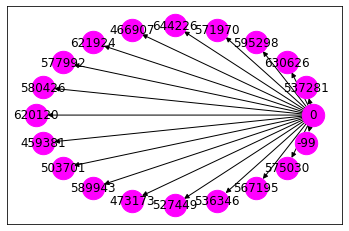

In [0]:
ego_net = nx.ego_graph(templateG, n=0)
print(nx.info(ego_net))
fig = plt.Figure(figsize=(30,30))
pos=nx.shell_layout(ego_net)

nx.draw_networkx(ego_net, pos, node_size=500, node_color='magenta')

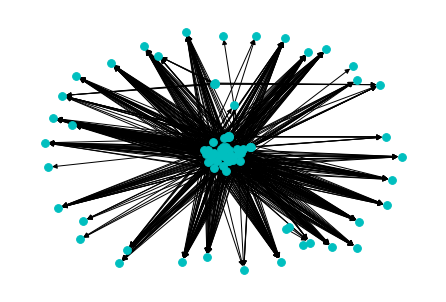

number of nodes:  88
number of edges:  859


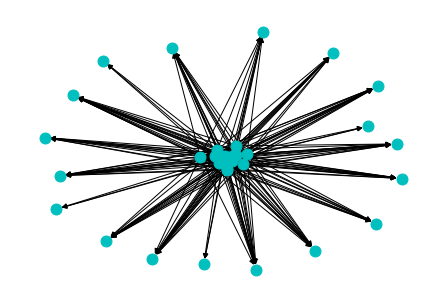

In [0]:
fig = plt.Figure(figsize=(30,30))
# Copy a graph model
G = templateG
# Let's draw the graph
pos= nx.spring_layout(G)
nx.draw(G, pos, node_color='c', node_size=60 ,with_labels=False)
plt.show()
# find node with largest degree
node_degree = G.degree()
# calculate number of nodes
print("number of nodes: ", G.order())
# calculate number of edges
print("number of edges: ", G.size())
# find node with the largest degree
node_degree= G.degree()
series = pd.Series(dict(node_degree))
largest_deg = series.idxmax()
degree = series.max()
# Create ego graph of node with the largest degree
node_ego= nx.ego_graph(G,largest_deg)
# Draw ego graph
pos= nx.spring_layout(node_ego)
nx.draw(node_ego, pos, node_color='c', node_size=120, with_labels=False)
plt.show()

In [0]:
#TODO
#Add the Ego Network with two hops

#### 

In [0]:
max([y for x, y in node_degree])

47

In [0]:
series = pd.Series(dict(node_degree))
series.idxmax()
series.max()

47

In [0]:
node_degree

DiDegreeView({0: 23, -99: 1, 41: 47, 34: 34, 37: 35, 27: 38, 40: 31, 39: 29, 65: 30, 67: 5, 47: 37, 66: 1, 657187: 2, 78: 4, 81: 7, 80: 4, 70: 13, 43: 36, 56: 36, 57: 35, 58: 34, 63: 37, 77: 4, 79: 4, 45: 40, 69: 10, 76: 7, 82: 1, 83: 1, 84: 1, 73: 3, 75: 3, 74: 3, 71: 9, 72: 6, 87: 4, 85: 4, 86: 4, 2: 24, 630626: 24, 536346: 13, 510031: 18, 520660: 10, 552988: 36, 567195: 30, 527449: 36, 459381: 36, 595298: 36, 466907: 33, 589943: 27, 577992: 19, 537281: 22, 523927: 28, 580426: 24, 595581: 23, 642329: 25, 503701: 33, 571970: 25, 644226: 13, 632961: 26, 473173: 36, 620120: 36, 621924: 23, 616315: 25, 29: 21, 575030: 26, 31: 23, 503218: 4, 33: 21, 35: 17, 36: 20, 38: 19, 42: 18, 44: 17, 46: 21, 48: 17, 49: 26, 640784: 1, 606730: 3, 52: 20, 53: 16, 54: 19, 55: 14, 59: 16, 60: 17, 61: 20, 62: 19, 64: 19})

#### Degree Centrality

In [0]:
degree_centralityTemplate = nx.degree_centrality(templateG)
degree_centralityGraph1 = nx.degree_centrality(graph1G)
degree_centralityGraph2 = nx.degree_centrality(graph2G)
degree_centralityGraph3 = nx.degree_centrality(graph3G)
degree_centralityGraph4 = nx.degree_centrality(graph4G)
degree_centralityGraph5 = nx.degree_centrality(graph5G)

In [0]:
print(degree_centralityGraph5)

{619322: 0.8470588235294118, 590442: 0.011764705882352941, 594308: 0.5882352941176471, 549840: 0.32941176470588235, 524153: 0.6235294117647059, 629769: 0.011764705882352941, 461577: 0.011764705882352941, 547205: 0.011764705882352941, 483784: 0.5764705882352941, 631903: 0.32941176470588235, 549891: 0.047058823529411764, 632485: 0.011764705882352941, 657173: 0.11764705882352941, 477657: 0.6235294117647059, 620947: 0.011764705882352941, 492039: 0.023529411764705882, 616453: 0.3529411764705882, 483999: 0.023529411764705882, 644754: 0.011764705882352941, 525263: 0.011764705882352941, 532852: 0.011764705882352941, 625756: 0.11764705882352941, 517649: 0.011764705882352941, 509607: 0.29411764705882354, 587437: 0.011764705882352941, 623736: 0.011764705882352941, 493358: 0.03529411764705882, 561819: 0.38823529411764707, 561157: 0.3529411764705882, 530990: 0.32941176470588235, 643087: 0.011764705882352941, 569044: 0.011764705882352941, 556592: 0.011764705882352941, 585589: 0.011764705882352941, 5

In [0]:
print("degree centrality range for All channel in Template: ",
      min(list(degree_centralityTemplate.values())), 
      max(list(degree_centralityTemplate.values())))

print("degree centrality range for All channel in graph 1: ",
      min(list(degree_centralityGraph1.values())), 
      max(list(degree_centralityGraph1.values())))

print("degree centrality range for All channel in graph 2: ",
      min(list(degree_centralityGraph2.values())), 
      max(list(degree_centralityGraph2.values())))

print("degree centrality range for All channel in graph 3: ",
      min(list(degree_centralityGraph3.values())), 
      max(list(degree_centralityGraph3.values())))

print("degree centrality range for All channel in graph 4: ",
      min(list(degree_centralityGraph4.values())), 
      max(list(degree_centralityGraph4.values())))

print("degree centrality range for All channel in graph 5: ",
      min(list(degree_centralityGraph5.values())), 
      max(list(degree_centralityGraph5.values())))

degree centrality range for All channel in Template:  0.011494252873563218 2.390804597701149
degree centrality range for All channel in graph 1:  0.010869565217391304 1.467391304347826
degree centrality range for All channel in graph 2:  0.011627906976744186 2.2325581395348837
degree centrality range for All channel in graph 3:  0.01282051282051282 0.8717948717948718
degree centrality range for All channel in graph 4:  0.011627906976744186 0.7441860465116279
degree centrality range for All channel in graph 5:  0.011764705882352941 0.8470588235294118


In [0]:
#pd.DataFrame(list(zip([y for x, y in degree_centralityTemplate], [x for x, y in degree_centralityTemplate])))
#[y for x, y in degree_centralityTemplate.items()]
#pd.DataFrame(list(zip([y for x, y in degree_centralityTemplate.items()], [x for x, y in degree_centralityTemplate.items()])))

In [0]:
fig = make_subplots(rows=3, cols=2)

numberOfBins = 6
# autobinx=True
df = pd.DataFrame(list(zip([y for x, y in degree_centralityTemplate.items()], [x for x, y in degree_centralityTemplate.items()])))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=numberOfBins)

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph1.items()], [x for x, y in degree_centralityGraph1.items()])))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = numberOfBins)

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph2.items()], [x for x, y in degree_centralityGraph2.items()])))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = numberOfBins)

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph3.items()], [x for x, y in degree_centralityGraph3.items()])))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=numberOfBins)

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph4.items()], [x for x, y in degree_centralityGraph4.items()])))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=numberOfBins)

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph5.items()], [x for x, y in degree_centralityGraph5.items()])))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=numberOfBins)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)

fig.update_layout(barmode='overlay')
fig.show()

In [0]:

fig = go.Figure()

numberOfBins = 6

df = pd.DataFrame(list(zip([y for x, y in degree_centralityTemplate.items()], [x for x, y in degree_centralityTemplate.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, nbinsx=numberOfBins))

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph1.items()], [x for x, y in degree_centralityGraph1.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, nbinsx=numberOfBins))

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph2.items()], [x for x, y in degree_centralityGraph2.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, nbinsx=numberOfBins))

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph3.items()], [x for x, y in degree_centralityGraph3.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, nbinsx=numberOfBins))

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph4.items()], [x for x, y in degree_centralityGraph4.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, nbinsx=numberOfBins))

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph5.items()], [x for x, y in degree_centralityGraph5.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, nbinsx=numberOfBins))


# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

#### Closeness Centrality

In [0]:
closeness_centralityTemplate = nx.closeness_centrality(templateG)
closeness_centralityGraph1 = nx.closeness_centrality(graph1G)
closeness_centralityGraph2 = nx.closeness_centrality(graph2G)
closeness_centralityGraph3 = nx.closeness_centrality(graph3G)
closeness_centralityGraph4 = nx.closeness_centrality(graph4G)
closeness_centralityGraph5 = nx.closeness_centrality(graph5G)

In [0]:
print(closeness_centralityGraph5)
sum(list(closeness_centralityTemplate.values()))

{619322: 0.08067226890756302, 590442: 0.05847750865051903, 594308: 0.05841784989858012, 549840: 0.06776470588235294, 524153: 0.06515837104072399, 629769: 0.050980392156862744, 461577: 0.050980392156862744, 547205: 0.05847750865051903, 483784: 0.08067226890756302, 631903: 0.08067226890756302, 549891: 0.05847750865051903, 632485: 0.050980392156862744, 657173: 0.05847750865051903, 477657: 0.07365728900255754, 620947: 0.050980392156862744, 492039: 0.06855983772819474, 616453: 0.08284313725490196, 483999: 0.06855983772819474, 644754: 0.050980392156862744, 525263: 0.050980392156862744, 532852: 0.05847750865051903, 625756: 0.07100840336134455, 517649: 0.050980392156862744, 509607: 0.07647058823529412, 587437: 0.050980392156862744, 623736: 0.050980392156862744, 493358: 0.05847750865051903, 561819: 0.08916408668730649, 561157: 0.07647058823529412, 530990: 0.08916408668730649, 643087: 0.050980392156862744, 569044: 0.05847750865051903, 556592: 0.050980392156862744, 585589: 0.050980392156862744, 5

13.462339002338013

In [0]:
print("centrality closeness range for All channel in Template: ",
      min(list(closeness_centralityTemplate.values())), 
      max(list(closeness_centralityTemplate.values())))

print("centrality closeness range for All channel in graph 1: ",
      min(list(closeness_centralityGraph1.values())), 
      max(list(closeness_centralityGraph1.values())))

print("centrality closeness range for All channel in graph 2: ",
      min(list(closeness_centralityGraph2.values())), 
      max(list(closeness_centralityGraph2.values())))

print("centrality closeness range for All channel in graph 3: ",
      min(list(closeness_centralityGraph3.values())), 
      max(list(closeness_centralityGraph3.values())))

print("centrality closeness range for All channel in graph 4: ",
      min(list(closeness_centralityGraph4.values())), 
      max(list(closeness_centralityGraph4.values())))

print("centrality closeness range for All channel in graph 5: ",
      min(list(closeness_centralityGraph5.values())), 
      max(list(closeness_centralityGraph5.values())))

centrality closeness range for All channel in Template:  0.0 0.4179728317659352
centrality closeness range for All channel in graph 1:  0.0 0.4816053511705686
centrality closeness range for All channel in graph 2:  0.0 0.49209302325581394
centrality closeness range for All channel in graph 3:  0.0 0.34547908232118757
centrality closeness range for All channel in graph 4:  0.0 0.2940735183795949
centrality closeness range for All channel in graph 5:  0.0 0.12426470588235294


In [0]:
#pd.DataFrame(list(zip([y for x, y in degree_centralityTemplate], [x for x, y in degree_centralityTemplate])))
#[y for x, y in degree_centralityTemplate.items()]
#pd.DataFrame(list(zip([y for x, y in degree_centralityTemplate.items()], [x for x, y in degree_centralityTemplate.items()])))

In [0]:
fig = make_subplots(rows=3, cols=2)

# autobinx=True
df = pd.DataFrame(list(zip([y for x, y in closeness_centralityTemplate.items()], [x for x, y in closeness_centralityTemplate.items()])))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph1.items()], [x for x, y in closeness_centralityGraph1.items()])))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph2.items()], [x for x, y in closeness_centralityGraph2.items()])))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph3.items()], [x for x, y in closeness_centralityGraph3.items()])))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph4.items()], [x for x, y in closeness_centralityGraph4.items()])))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph5.items()], [x for x, y in closeness_centralityGraph5.items()])))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=12)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)

fig.update_layout(barmode='overlay')
fig.show()

In [0]:

fig = go.Figure()

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityTemplate.items()], [x for x, y in closeness_centralityTemplate.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph1.items()], [x for x, y in closeness_centralityGraph1.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph2.items()], [x for x, y in closeness_centralityGraph2.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph3.items()], [x for x, y in closeness_centralityGraph3.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph4.items()], [x for x, y in closeness_centralityGraph4.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph5.items()], [x for x, y in closeness_centralityGraph5.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))


# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

#### Betweenness Centrality
not for multi-graph

In [0]:
betweenness_centralityTemplate = nx.betweenness_centrality(templateG, normalized=False)
betweenness_centralityGraph1 = nx.betweenness_centrality(graph1G, normalized=False)
betweenness_centralityGraph2 = nx.betweenness_centrality(graph2G, normalized=False)
betweenness_centralityGraph3 = nx.betweenness_centrality(graph3G, normalized=False)
betweenness_centralityGraph4 = nx.betweenness_centrality(graph4G, normalized=False)
betweenness_centralityGraph5 = nx.betweenness_centrality(graph5G, normalized=False)
betweenness_centralitySeed1 = nx.betweenness_centrality(seed1G, normalized=False)
betweenness_centralitySeed2 = nx.betweenness_centrality(seed2G, normalized=False)
betweenness_centralitySeed3 = nx.betweenness_centrality(seed3G, normalized=False)

In [0]:
print(betweenness_centralityGraph5)

{619322: 0.034644802365390595, 590442: 0.0, 594308: 0.012670234760570895, 549840: 0.012859254813036323, 524153: 0.047526844070961714, 629769: 0.0, 461577: 0.0, 547205: 0.0, 483784: 0.020662209328175713, 631903: 0.029154328398025873, 549891: 0.0, 632485: 0.0, 657173: 0.0, 477657: 0.010570061357876484, 620947: 0.0, 492039: 0.0, 616453: 0.0, 483999: 0.0, 644754: 0.0, 525263: 0.0, 532852: 0.0, 625756: 0.0, 517649: 0.0, 509607: 0.0, 587437: 0.0, 623736: 0.0, 493358: 0.0, 561819: 0.0128921568627451, 561157: 0.0, 530990: 0.004027611044417767, 643087: 0.0, 569044: 0.0, 556592: 0.0, 585589: 0.0, 579218: 0.0, 573137: 0.0011779711884753901, 567281: 0.0, 624532: 0.0, 499177: 0.0, 605235: 0.0, 641131: 0.0, 499467: 0.0, 654641: 0.0, 620076: 0.0, 652996: 0.0, 558930: 0.0, 469675: 0.0, 657035: 0.0, 590595: 0.0, 529694: 0.0, 528019: 0.0, 472749: 0.0, 550251: 0.0, 619245: 0.0, 584229: 0.0, 544444: 0.0, 555931: 0.0, 503218: 0.0, 536346: 0.0, 520660: 0.0, 567195: 0.0, 527449: 0.0, 459381: 0.0, 595298: 0.0

In [0]:
print("centrality betweenness range for All channel in Template: ",
      min(list(betweenness_centralityTemplate.values())), 
      max(list(betweenness_centralityTemplate.values())))

print("centrality betweenness range for All channel in graph 1: ",
      min(list(betweenness_centralityGraph1.values())), 
      max(list(betweenness_centralityGraph1.values())))

print("centrality betweenness range for All channel in graph 2: ",
      min(list(betweenness_centralityGraph2.values())), 
      max(list(betweenness_centralityGraph2.values())))

print("centrality betweenness range for All channel in graph 3: ",
      min(list(betweenness_centralityGraph3.values())), 
      max(list(betweenness_centralityGraph3.values())))

print("centrality betweenness range for All channel in graph 4: ",
      min(list(betweenness_centralityGraph4.values())), 
      max(list(betweenness_centralityGraph4.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(betweenness_centralityGraph5.values())), 
      max(list(betweenness_centralityGraph5.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(betweenness_centralitySeed1.values())), 
      max(list(betweenness_centralitySeed1.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(betweenness_centralitySeed2.values())), 
      max(list(betweenness_centralitySeed2.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(betweenness_centralitySeed3.values())), 
      max(list(betweenness_centralitySeed3.values())))



centrality betweenness range for All channel in Template:  0.0 65.3281746031746
centrality betweenness range for All channel in graph 1:  0.0 202.73333333333332
centrality betweenness range for All channel in graph 2:  0.0 142.78333333333333
centrality betweenness range for All channel in graph 3:  0.0 54.33333333333333
centrality betweenness range for All channel in graph 4:  0.0 178.75
centrality betweenness range for All channel in graph 5:  0.0 1831.9514164524846
centrality betweenness range for All channel in graph 5:  0.0 1060.104761904762
centrality betweenness range for All channel in graph 5:  0.0 0.0
centrality betweenness range for All channel in graph 5:  0.0 1865.2014164524844


In [32]:
print("wasserstein distance between Template and Graph 1 is: ", 
      wasserstein_distance([y for x, y in betweenness_centralityTemplate.items()], 
                           [y for x, y in betweenness_centralityGraph1.items()]))
print("wasserstein distance between Template and Graph 2 is: ", 
      wasserstein_distance([y for x, y in betweenness_centralityTemplate.items()], 
                           [y for x, y in betweenness_centralityGraph2.items()]))
print("wasserstein distance between Template and Graph 3 is: ", 
      wasserstein_distance([y for x, y in betweenness_centralityTemplate.items()], 
                           [y for x, y in betweenness_centralityGraph3.items()]))
print("wasserstein distance between Template and Graph 4 is: ", 
      wasserstein_distance([y for x, y in betweenness_centralityTemplate.items()], 
                           [y for x, y in betweenness_centralityGraph4.items()]))
print("wasserstein distance between Template and Graph 5 is: ", 
      wasserstein_distance([y for x, y in betweenness_centralityTemplate.items()], 
                           [y for x, y in betweenness_centralityGraph5.items()]))

wasserstein distance between Template and Graph 1 is:  10.886229249675456
wasserstein distance between Template and Graph 2 is:  12.515753788489576
wasserstein distance between Template and Graph 3 is:  7.335006769567729
wasserstein distance between Template and Graph 4 is:  18.968423493105014
wasserstein distance between Template and Graph 5 is:  7.9011547200520695


In [35]:
#G.remove_edges_from(G.selfloop_edges())
templateG.selfloop_edges(data=True)

AttributeError: ignored

In [0]:
fig = make_subplots(rows=5, cols=2)

# autobinx=True
df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityTemplate.items()], [x for x, y in betweenness_centralityTemplate.items()])))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph1.items()], [x for x, y in betweenness_centralityGraph1.items()])))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph2.items()], [x for x, y in betweenness_centralityGraph2.items()])))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph3.items()], [x for x, y in betweenness_centralityGraph3.items()])))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph4.items()], [x for x, y in betweenness_centralityGraph4.items()])))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph5.items()], [x for x, y in betweenness_centralityGraph5.items()])))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=12)


df = pd.DataFrame(list(zip([y for x, y in betweenness_centralitySeed1.items()], [x for x, y in betweenness_centralitySeed1.items()])))
x = df[0]
trace6 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralitySeed2.items()], [x for x, y in betweenness_centralitySeed2.items()])))
x = df[0]
trace7 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralitySeed3.items()], [x for x, y in betweenness_centralitySeed3.items()])))
x = df[0]
trace8 = go.Histogram(x=x, nbinsx=12)


fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)
fig.append_trace(trace6, 4, 1)
fig.append_trace(trace7, 4, 2)
fig.append_trace(trace8, 5, 1)

fig.update_layout(height=1600, width=1600, title_text="Stacked Subplots")


fig.update_layout(barmode='overlay')
fig.show()

In [0]:
import plotly.figure_factory as ff
import numpy as np

measureTemplate = betweenness_centralityTemplate
measureGraph1 = betweenness_centralityGraph1
measureGraph2 = betweenness_centralityGraph2
measureGraph3 = betweenness_centralityGraph3
measureGraph4 = betweenness_centralityGraph4
measureGraph5 = betweenness_centralityGraph5
measureSeed1 = betweenness_centralitySeed1
measureSeed2 = betweenness_centralitySeed2
measureSeed3 = betweenness_centralitySeed3

# Add histogram data
df = pd.DataFrame(list(zip([y for x, y in measureTemplate.items()], [x for x, y in measureTemplate.items()])))
x1 = df[0]

df = pd.DataFrame(list(zip([y for x, y in measureGraph1.items()], [x for x, y in measureGraph1.items()])))
x2 = df[0]

df = pd.DataFrame(list(zip([y for x, y in measureGraph2.items()], [x for x, y in measureGraph2.items()])))
x3 = df[0]

df = pd.DataFrame(list(zip([y for x, y in measureGraph3.items()], [x for x, y in measureGraph3.items()])))
x4 = df[0]

df = pd.DataFrame(list(zip([y for x, y in measureGraph4.items()], [x for x, y in measureGraph4.items()])))
x5 = df[0]

df = pd.DataFrame(list(zip([y for x, y in measureGraph5.items()], [x for x, y in measureGraph5.items()])))
x6 = df[0]

df = pd.DataFrame(list(zip([y for x, y in measureSeed1.items()], [x for x, y in measureSeed1.items()])))
x7 = df[0]

#df = pd.DataFrame(list(zip([y for x, y in measureSeed2.items()], [x for x, y in measureSeed2.items()])))
x8 = df[0]

df = pd.DataFrame(list(zip([y for x, y in measureSeed3.items()], [x for x, y in measureSeed3.items()])))
x9 = df[0]

# Group data together
hist_data = [x1, x2, x3, x4, x5, x6, x7, x8, x9]

group_labels = ['Template', 'Graph 1', 'Graph 2', 'Graph 3', 'Graph 4','Graph 5', 'Seed 1', 'Seed 2', 'Seed 3']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=4, show_hist=False)
fig.show()

In [0]:
sorted(df[0], reverse=True)

In [0]:
fig = go.Figure()

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityTemplate.items()], [x for x, y in betweenness_centralityTemplate.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph1.items()], [x for x, y in betweenness_centralityGraph1.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph2.items()], [x for x, y in betweenness_centralityGraph2.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph3.items()], [x for x, y in betweenness_centralityGraph3.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph4.items()], [x for x, y in betweenness_centralityGraph4.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph5.items()], [x for x, y in betweenness_centralityGraph5.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))


# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75, nbinsx=12)
fig.show()


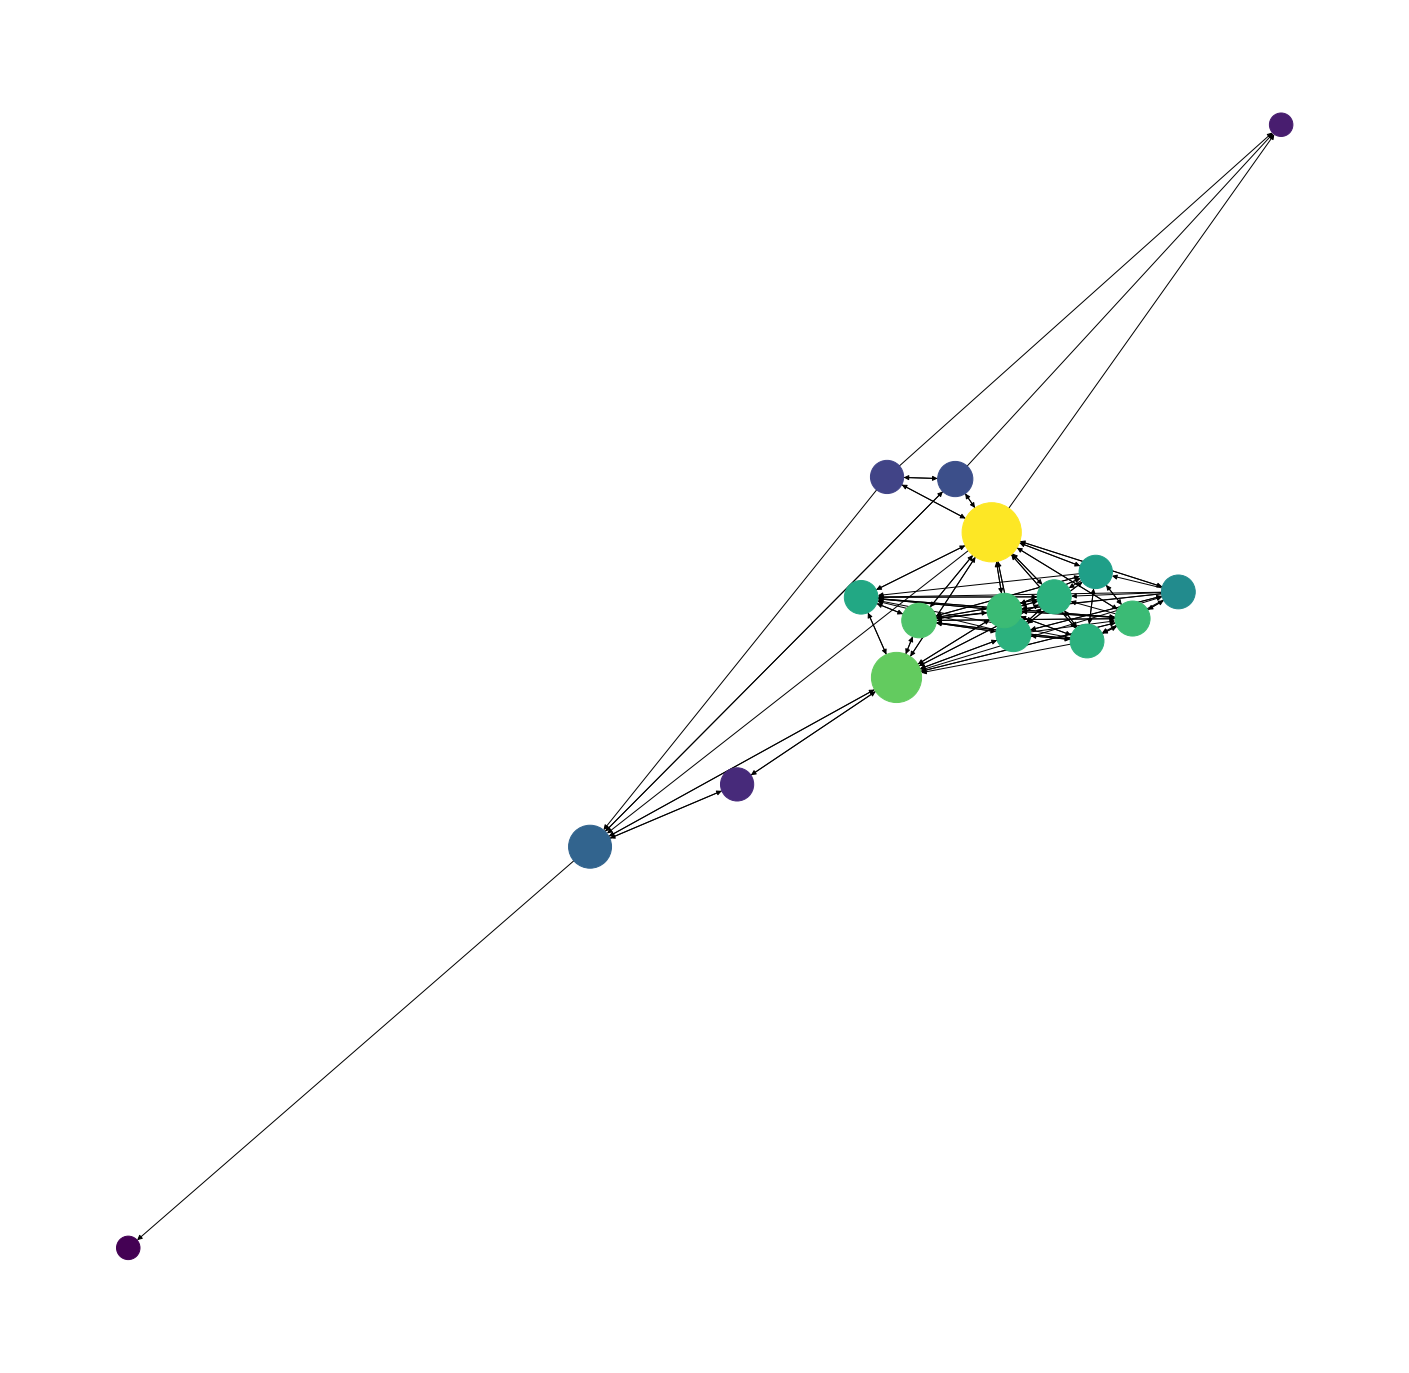

In [0]:
pos = nx.spring_layout(templateG)
betCent = nx.betweenness_centrality(templateG, normalized=True, endpoints=True)
node_color = [20000.0 * templateG.degree(v) for v in templateG]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(25,25))
nx.draw_networkx(templateG, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
plt.show()

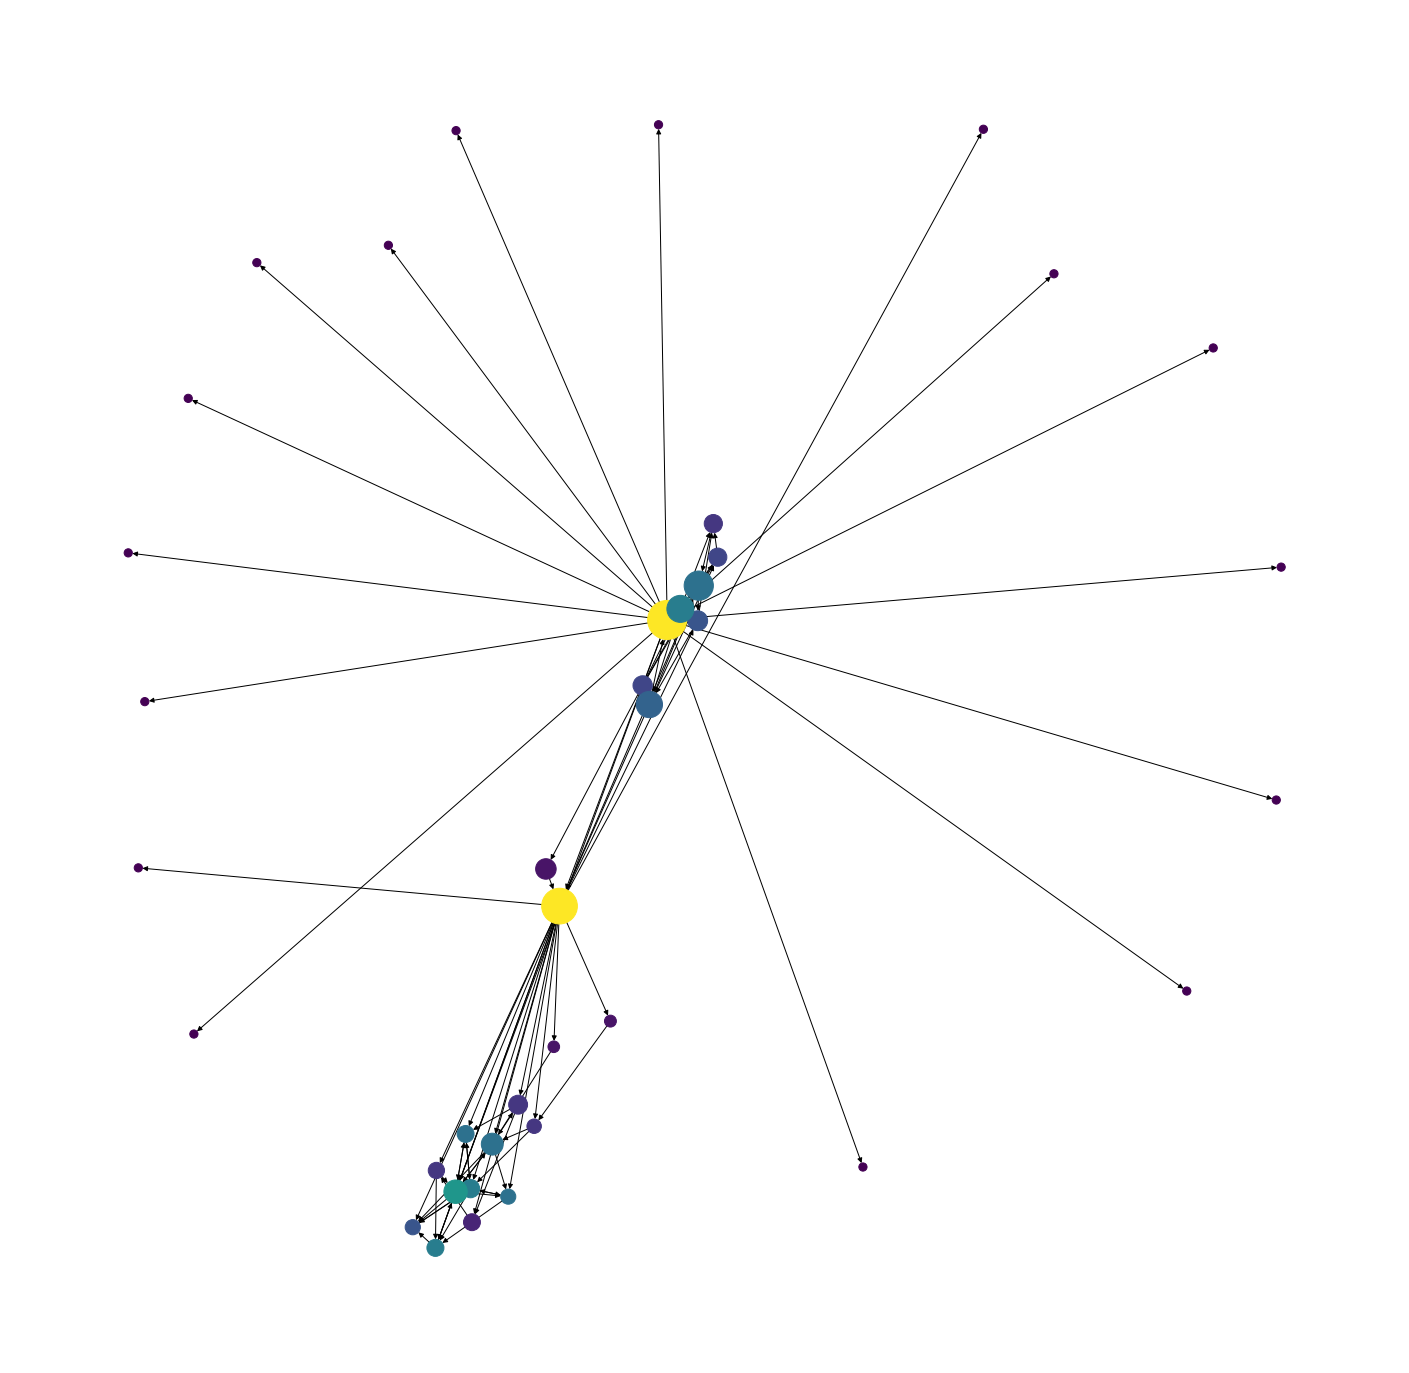

In [0]:
pos = nx.spring_layout(graph4G)
betCent = nx.betweenness_centrality(graph4G, normalized=True, endpoints=True)
node_color = [20000.0 * graph4G.degree(v) for v in graph4G]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(25,25))
nx.draw_networkx(graph4G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
plt.show()

#### Eigenvector Centrality
not for multi-graph

In [0]:
eigenvector_centralityTemplate = nx.eigenvector_centrality(templateG)
eigenvector_centralityGraph1 = nx.eigenvector_centrality(graph1G)
eigenvector_centralityGraph2 = nx.eigenvector_centrality(graph2G)
eigenvector_centralityGraph3 = nx.eigenvector_centrality(graph3G)
#eigenvector_centralityGraph4 = nx.eigenvector_centrality(graph4G)
eigenvector_centralityGraph5 = nx.eigenvector_centrality(graph5G)

In [0]:
print(eigenvector_centralityGraph5)

{619322: 0.034644802365390595, 590442: 0.0, 594308: 0.012670234760570895, 549840: 0.012859254813036323, 524153: 0.047526844070961714, 629769: 0.0, 461577: 0.0, 547205: 0.0, 483784: 0.020662209328175713, 631903: 0.029154328398025873, 549891: 0.0, 632485: 0.0, 657173: 0.0, 477657: 0.010570061357876484, 620947: 0.0, 492039: 0.0, 616453: 0.0, 483999: 0.0, 644754: 0.0, 525263: 0.0, 532852: 0.0, 625756: 0.0, 517649: 0.0, 509607: 0.0, 587437: 0.0, 623736: 0.0, 493358: 0.0, 561819: 0.0128921568627451, 561157: 0.0, 530990: 0.004027611044417767, 643087: 0.0, 569044: 0.0, 556592: 0.0, 585589: 0.0, 579218: 0.0, 573137: 0.0011779711884753901, 567281: 0.0, 624532: 0.0, 499177: 0.0, 605235: 0.0, 641131: 0.0, 499467: 0.0, 654641: 0.0, 620076: 0.0, 652996: 0.0, 558930: 0.0, 469675: 0.0, 657035: 0.0, 590595: 0.0, 529694: 0.0, 528019: 0.0, 472749: 0.0, 550251: 0.0, 619245: 0.0, 584229: 0.0, 544444: 0.0, 555931: 0.0, 503218: 0.0, 536346: 0.0, 520660: 0.0, 567195: 0.0, 527449: 0.0, 459381: 0.0, 595298: 0.0

In [0]:
print("centrality eigenvector range for All channel in Template: ",
      min(list(eigenvector_centralityTemplate.values())), 
      max(list(eigenvector_centralityTemplate.values())))

print("centrality eigenvector range for All channel in graph 1: ",
      min(list(eigenvector_centralityGraph1.values())), 
      max(list(eigenvector_centralityGraph1.values())))

print("centrality eigenvector range for All channel in graph 2: ",
      min(list(eigenvector_centralityGraph2.values())), 
      max(list(eigenvector_centralityGraph2.values())))

print("centrality eigenvector range for All channel in graph 3: ",
      min(list(eigenvector_centralityGraph3.values())), 
      max(list(eigenvector_centralityGraph3.values())))

print("centrality eigenvector range for All channel in graph 4: ",
      min(list(eigenvector_centralityGraph4.values())), 
      max(list(eigenvector_centralityGraph4.values())))

print("centrality eigenvector range for All channel in graph 5: ",
      min(list(eigenvector_centralityGraph5.values())), 
      max(list(eigenvector_centralityGraph5.values())))

In [0]:
fig = make_subplots(rows=3, cols=2)

# autobinx=True
df = pd.DataFrame(list(zip([y for x, y in eigenvector_centralityTemplate.items()], [x for x, y in eigenvector_centralityTemplate.items()])))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in eigenvector_centralityGraph1.items()], [x for x, y in eigenvector_centralityGraph1.items()])))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in eigenvector_centralityGraph2.items()], [x for x, y in eigenvector_centralityGraph2.items()])))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in eigenvector_centralityGraph3.items()], [x for x, y in eigenvector_centralityGraph3.items()])))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in eigenvector_centralityGraph4.items()], [x for x, y in eigenvector_centralityGraph4.items()])))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in eigenvector_centralityGraph5.items()], [x for x, y in eigenvector_centralityGraph5.items()])))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=12)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)

fig.update_layout(barmode='overlay')
fig.show()

In [0]:
fig = go.Figure()

df = pd.DataFrame(list(zip([y for x, y in eigenvector_centralityTemplate.items()], [x for x, y in eigenvector_centralityTemplate.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in eigenvector_centralityGraph1.items()], [x for x, y in eigenvector_centralityGraph1.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in eigenvector_centralityGraph2.items()], [x for x, y in eigenvector_centralityGraph2.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in eigenvector_centralityGraph3.items()], [x for x, y in eigenvector_centralityGraph3.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in eigenvector_centralityGraph4.items()], [x for x, y in eigenvector_centralityGraph4.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in eigenvector_centralityGraph5.items()], [x for x, y in eigenvector_centralityGraph5.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))


# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75, nbinsx=12)
fig.show()


#### PageRank
not for multi-graph

In [0]:
pagerankTemplate = nx.pagerank(templateG)
pagerankGraph1 = nx.pagerank(graph1G)
pagerankGraph2 = nx.pagerank(graph2G)
pagerankGraph3 = nx.pagerank(graph3G)
pagerankGraph4 = nx.pagerank(graph4G)
pagerankGraph5 = nx.pagerank(graph5G)
pagerankSeed1 = nx.pagerank(seed1G)
pagerankSeed2 = nx.pagerank(seed2G)
pagerankSeed3 = nx.pagerank(seed3G)


In [80]:
print(pagerankGraph5)

{619322: 0.013038596887807473, 590442: 0.010209402779011036, 594308: 0.012824841904623062, 549840: 0.013343307274971718, 524153: 0.01316702031388485, 629769: 0.010142997842042633, 461577: 0.010142997842042633, 547205: 0.010209402779011036, 483784: 0.02396121680202285, 631903: 0.012238996817302603, 549891: 0.010209402779011036, 632485: 0.010142997842042633, 657173: 0.010209402779011036, 477657: 0.013570744420576836, 620947: 0.010142997842042633, 492039: 0.0104425496029522, 616453: 0.011573071866712317, 483999: 0.0104425496029522, 644754: 0.010142997842042633, 525263: 0.010142997842042633, 532852: 0.010209402779011036, 625756: 0.010733683247165792, 517649: 0.010142997842042633, 509607: 0.01104879139855756, 587437: 0.010142997842042633, 623736: 0.010142997842042633, 493358: 0.010405275524305972, 561819: 0.013072990439243913, 561157: 0.011621408193400583, 530990: 0.013619818171737132, 643087: 0.010142997842042633, 569044: 0.010209402779011036, 556592: 0.010142997842042633, 585589: 0.010142

In [0]:
print("pagerank range for All channel in Template: ",
      min(list(pagerankTemplate.values())), 
      max(list(pagerankTemplate.values())))

print("pagerank range for All channel in graph 1: ",
      min(list(pagerankGraph1.values())), 
      max(list(pagerankGraph1.values())))

print("pagerank range for All channel in graph 2: ",
      min(list(pagerankGraph2.values())), 
      max(list(pagerankGraph2.values())))

print("pagerank range for All channel in graph 3: ",
      min(list(pagerankGraph3.values())), 
      max(list(pagerankGraph3.values())))

print("pagerank range for All channel in graph 4: ",
      min(list(pagerankGraph4.values())), 
      max(list(pagerankGraph4.values())))

print("pagerank range for All channel in graph 5: ",
      min(list(pagerankGraph5.values())), 
      max(list(pagerankGraph5.values())))

pagerank range for All channel in Template:  0.022151622157961223 0.0966452670650982
pagerank range for All channel in graph 1:  0.020060588593466003 0.14822985549590903
pagerank range for All channel in graph 2:  0.008333333333333335 0.14312860058879823
pagerank range for All channel in graph 3:  0.029443880595759562 0.18246407176480128
pagerank range for All channel in graph 4:  0.0074683084592017356 0.12828734199786343
pagerank range for All channel in graph 5:  0.005632777722890711 0.16488401084388857


In [81]:
print("wasserstein distance between Template and Graph 1 is: ", 
      wasserstein_distance([y for x, y in pagerankTemplate.items()], 
                           [y for x, y in pagerankGraph1.items()]))
print("wasserstein distance between Template and Graph 2 is: ", 
      wasserstein_distance([y for x, y in pagerankTemplate.items()], 
                           [y for x, y in pagerankGraph2.items()]))
print("wasserstein distance between Template and Graph 3 is: ", 
      wasserstein_distance([y for x, y in pagerankTemplate.items()], 
                           [y for x, y in pagerankGraph3.items()]))
print("wasserstein distance between Template and Graph 4 is: ", 
      wasserstein_distance([y for x, y in pagerankTemplate.items()], 
                           [y for x, y in pagerankGraph4.items()]))
print("wasserstein distance between Template and Graph 5 is: ", 
      wasserstein_distance([y for x, y in pagerankTemplate.items()], 
                           [y for x, y in pagerankGraph5.items()]))

wasserstein distance between Template and Graph 1 is:  0.000746943565355225
wasserstein distance between Template and Graph 2 is:  0.0007072478932058199
wasserstein distance between Template and Graph 3 is:  0.0013046421318182989
wasserstein distance between Template and Graph 4 is:  0.0015133923936583192
wasserstein distance between Template and Graph 5 is:  0.0026485006635318603


In [0]:
fig = make_subplots(rows=3, cols=2)

# autobinx=True
df = pd.DataFrame(list(zip([y for x, y in pagerankTemplate.items()], [x for x, y in pagerankTemplate.items()])))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in pagerankGraph1.items()], [x for x, y in pagerankGraph1.items()])))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in pagerankGraph2.items()], [x for x, y in pagerankGraph2.items()])))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in pagerankGraph3.items()], [x for x, y in pagerankGraph3.items()])))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in pagerankGraph4.items()], [x for x, y in pagerankGraph4.items()])))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in pagerankGraph5.items()], [x for x, y in pagerankGraph5.items()])))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=12)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)

fig.update_layout(barmode='overlay')
fig.show()

In [0]:
measureTemplate = pagerankTemplate
measureGraph1 = pagerankGraph1
measureGraph2 = pagerankGraph2
measureGraph3 = pagerankGraph3
measureGraph4 = pagerankGraph4
measureGraph5 = pagerankGraph5
measureSeed1 = pagerankSeed1
measureSeed2 = pagerankSeed2
measureSeed3 = pagerankSeed3

# Add histogram data
df = pd.DataFrame(list(zip([y for x, y in measureTemplate.items()], [x for x, y in measureTemplate.items()])))
x1 = df[0]

df = pd.DataFrame(list(zip([y for x, y in measureGraph1.items()], [x for x, y in measureGraph1.items()])))
x2 = df[0]

df = pd.DataFrame(list(zip([y for x, y in measureGraph2.items()], [x for x, y in measureGraph2.items()])))
x3 = df[0]

df = pd.DataFrame(list(zip([y for x, y in measureGraph3.items()], [x for x, y in measureGraph3.items()])))
x4 = df[0]

df = pd.DataFrame(list(zip([y for x, y in measureGraph4.items()], [x for x, y in measureGraph4.items()])))
x5 = df[0]

df = pd.DataFrame(list(zip([y for x, y in measureGraph5.items()], [x for x, y in measureGraph5.items()])))
x6 = df[0]

df = pd.DataFrame(list(zip([y for x, y in measureSeed1.items()], [x for x, y in measureSeed1.items()])))
x7 = df[0]

#df = pd.DataFrame(list(zip([y for x, y in measureSeed2.items()], [x for x, y in measureSeed2.items()])))
x8 = df[0]

df = pd.DataFrame(list(zip([y for x, y in measureSeed3.items()], [x for x, y in measureSeed3.items()])))
x9 = df[0]

# Group data together
hist_data = [x1, x2, x3, x4, x5, x6, x7, x8, x9]

group_labels = ['Template', 'Graph 1', 'Graph 2', 'Graph 3', 'Graph 4','Graph 5', 'Seed 1', 'Seed 2', 'Seed 3']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=4, show_hist=False)
fig.show()

In [0]:
wasserstein_distance(x1, x9)

0.042429941257543576

In [0]:
wasserstein_distance(x1, x6)

0.042217327249410484

In [0]:
energy_distance(x1, x9)

0.21827953523761817

In [0]:
fig = go.Figure()

df = pd.DataFrame(list(zip([y for x, y in pagerankTemplate.items()], [x for x, y in pagerankTemplate.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=.034, size=.034/8)))

df = pd.DataFrame(list(zip([y for x, y in pagerankGraph1.items()], [x for x, y in pagerankGraph1.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=.034, size=.034/8)))

df = pd.DataFrame(list(zip([y for x, y in pagerankGraph2.items()], [x for x, y in pagerankGraph2.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=.034, size=.034/8)))

df = pd.DataFrame(list(zip([y for x, y in pagerankGraph3.items()], [x for x, y in pagerankGraph3.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=.034, size=.034/8)))

df = pd.DataFrame(list(zip([y for x, y in pagerankGraph4.items()], [x for x, y in pagerankGraph4.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=.034, size=.034/8)))

df = pd.DataFrame(list(zip([y for x, y in pagerankGraph5.items()], [x for x, y in pagerankGraph5.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=.034, size=.034/8)))


# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75, nbinsx=12)
fig.show()


In [0]:
print(templateG.neighbors(0))

#### Group level analysis

##### Clustering
check for multi-graph

In [0]:
clusteringTemplate = nx.clustering(templateG)
clusteringGraph1 = nx.clustering(graph1G)
clusteringGraph2 = nx.clustering(graph2G)
clusteringGraph3 = nx.clustering(graph3G)
clusteringGraph4 = nx.clustering(graph4G)
clusteringGraph5 = nx.clustering(graph5G)

In [0]:
print(clusteringGraph5)

{619322: 0.062137049941927994, 590442: 0, 594308: 0.11397849462365592, 549840: 0.13538461538461538, 524153: 0.02564102564102564, 629769: 0, 461577: 0, 547205: 0, 483784: 0.08990147783251232, 631903: 0.14666666666666667, 549891: 0, 632485: 0, 657173: 0, 477657: 0.1339031339031339, 620947: 0, 492039: 0, 616453: 0.3333333333333333, 483999: 0, 644754: 0, 525263: 0, 532852: 0, 625756: 0.5, 517649: 0, 509607: 0.16666666666666666, 587437: 0, 623736: 0, 493358: 0, 561819: 0.11083743842364532, 561157: 0.16666666666666666, 530990: 0.14, 643087: 0, 569044: 0, 556592: 0, 585589: 0, 579218: 0, 573137: 0.08876811594202899, 567281: 0, 624532: 0, 499177: 0, 605235: 0, 641131: 0, 499467: 0, 654641: 0, 620076: 0, 652996: 0, 558930: 0, 469675: 0, 657035: 0, 590595: 0, 529694: 0, 528019: 0, 472749: 0, 550251: 0, 619245: 0, 584229: 0, 544444: 0, 555931: 0, 503218: 0, 536346: 0.2857142857142857, 520660: 0, 567195: 0.2857142857142857, 527449: 0.2777777777777778, 459381: 0.2777777777777778, 595298: 0.27777777

In [0]:
print("clustering range for All channel in Template: ",
      min(list(clusteringTemplate.values())), 
      max(list(clusteringTemplate.values())))

print("clustering range for All channel in graph 1: ",
      min(list(clusteringGraph1.values())), 
      max(list(clusteringGraph1.values())))

print("clustering range for All channel in graph 2: ",
      min(list(clusteringGraph2.values())), 
      max(list(clusteringGraph2.values())))

print("clustering range for All channel in graph 3: ",
      min(list(clusteringGraph3.values())), 
      max(list(clusteringGraph3.values())))

print("clustering range for All channel in graph 4: ",
      min(list(clusteringGraph4.values())), 
      max(list(clusteringGraph4.values())))

print("clustering range for All channel in graph 5: ",
      min(list(clusteringGraph5.values())), 
      max(list(clusteringGraph5.values())))

clustering range for All channel in Template:  0 1.0
clustering range for All channel in graph 1:  0 1.0
clustering range for All channel in graph 2:  0 1.0
clustering range for All channel in graph 3:  0 1.0
clustering range for All channel in graph 4:  0 0.5
clustering range for All channel in graph 5:  0 0.5


In [0]:
fig = make_subplots(rows=3, cols=2)

# autobinx=True
df = pd.DataFrame(list(zip([y for x, y in clusteringTemplate.items()], [x for x, y in clusteringTemplate.items()])))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in clusteringGraph1.items()], [x for x, y in clusteringGraph1.items()])))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in clusteringGraph2.items()], [x for x, y in clusteringGraph2.items()])))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in clusteringGraph3.items()], [x for x, y in clusteringGraph3.items()])))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in clusteringGraph4.items()], [x for x, y in clusteringGraph4.items()])))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in clusteringGraph5.items()], [x for x, y in clusteringGraph5.items()])))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=12)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)

fig.update_layout(barmode='overlay')
fig.show()

In [0]:
fig = go.Figure()

df = pd.DataFrame(list(zip([y for x, y in clusteringTemplate.items()], [x for x, y in clusteringTemplate.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=1, size=1/8)))

df = pd.DataFrame(list(zip([y for x, y in clusteringGraph1.items()], [x for x, y in clusteringGraph1.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=1, size=1/8)))

df = pd.DataFrame(list(zip([y for x, y in clusteringGraph2.items()], [x for x, y in clusteringGraph2.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=1, size=1/8)))

df = pd.DataFrame(list(zip([y for x, y in clusteringGraph3.items()], [x for x, y in clusteringGraph3.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=1, size=1/8)))

df = pd.DataFrame(list(zip([y for x, y in clusteringGraph4.items()], [x for x, y in clusteringGraph4.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=1, size=1/8)))

df = pd.DataFrame(list(zip([y for x, y in clusteringGraph5.items()], [x for x, y in clusteringGraph5.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=1, size=1/8)))


# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75, nbinsx=12)
fig.show()


Average clustering

In [0]:
print(nx.average_clustering(templateG))
print(nx.average_clustering(graph1G))
print(nx.average_clustering(graph2G))
print(nx.average_clustering(graph3G))
print(nx.average_clustering(graph4G))
print(nx.average_clustering(graph5G))

0.09660577088748222
0.07515346862229869
0.10101392769159073
0.08972339314191981
0.09074576781084649
0.10896082228804548


triadic census

In [0]:
print(nx.triadic_census(templateG))
print(nx.triadic_census(graph1G))
print(nx.triadic_census(graph2G))
print(nx.triadic_census(graph3G))
print(nx.triadic_census(graph4G))
print(nx.triadic_census(graph5G))

{'003': 58208, '012': 31861, '102': 2372, '021D': 6462, '021U': 7746, '021C': 1433, '111D': 31, '111U': 488, '030T': 294, '030C': 9, '201': 40, '120D': 72, '120U': 565, '120C': 27, '210': 63, '300': 65}
{'003': 67416, '012': 37620, '102': 1661, '021D': 8092, '021U': 11647, '021C': 1928, '111D': 26, '111U': 389, '030T': 446, '030C': 2, '201': 47, '120D': 48, '120U': 385, '120C': 11, '210': 28, '300': 20}
{'003': 51420, '012': 30543, '102': 1831, '021D': 8057, '021U': 10915, '021C': 1714, '111D': 44, '111U': 411, '030T': 358, '030C': 2, '201': 61, '120D': 59, '120U': 497, '120C': 10, '210': 48, '300': 25}
{'003': 44925, '012': 22554, '102': 774, '021D': 4728, '021U': 4511, '021C': 957, '111D': 24, '111U': 147, '030T': 201, '030C': 2, '201': 9, '120D': 20, '120U': 201, '120C': 12, '210': 6, '300': 8}
{'003': 67141, '012': 26975, '102': 395, '021D': 5632, '021U': 3212, '021C': 1501, '111D': 25, '111U': 104, '030T': 843, '030C': 19, '201': 8, '120D': 21, '120U': 113, '120C': 6, '210': 0, '3

transitivity

In [0]:
print(nx.transitivity(templateG))
print(nx.transitivity(graph1G))
print(nx.transitivity(graph2G))
print(nx.transitivity(graph3G))
print(nx.transitivity(graph4G))
print(nx.transitivity(graph5G))

0.12304731718360878
0.07697348523036597
0.08763956130817113
0.0648964896489649
0.08165204678362573
0.052448453608247424


Radius (not aplicable)

In [0]:
print(nx.radius(graph1G))

Diameter (not aplicable)

In [0]:
print(nx.diameter(graph1G))

eccentricity (not aplicable)

In [0]:
print(nx.eccentricity(graph5G))

reciptory

In [0]:
und_templateG = templateG.to_undirected()
reciprocity = float(nx.number_of_edges(und_templateG)/nx.number_of_edges(templateG))
print(reciprocity)

und_graph1G = graph1G.to_undirected()
reciprocity = float(nx.number_of_edges(und_graph1G)/nx.number_of_edges(graph1G))
print(reciprocity)

und_graph2G = graph2G.to_undirected()
reciprocity = float(nx.number_of_edges(und_graph2G)/nx.number_of_edges(graph2G))
print(reciprocity)

und_graph3G = graph3G.to_undirected()
reciprocity = float(nx.number_of_edges(und_graph3G)/nx.number_of_edges(graph3G))
print(reciprocity)

und_graph4G = graph4G.to_undirected()
reciprocity = float(nx.number_of_edges(und_graph4G)/nx.number_of_edges(graph4G))
print(reciprocity)

und_graph5G = graph5G.to_undirected()
reciprocity = float(nx.number_of_edges(und_graph5G)/nx.number_of_edges(graph5G))
print(reciprocity)

0.9464493597206054
0.9693564862104188
0.9611344537815126
0.9735973597359736
0.9869918699186991
1.0


find cores

In [0]:
print(nx.find_cores(templateG))
print(nx.find_cores(graph1G))
print(nx.find_cores(graph2G))
print(nx.find_cores(graph3G))
#G.remove_edges_from(nx.selfloop_edges(G))
#print(nx.find_cores(graph4G))
print(nx.find_cores(graph5G))

{0: 17, -99: 1, 41: 17, 34: 17, 37: 17, 27: 17, 40: 17, 39: 17, 65: 17, 67: 4, 47: 17, 66: 1, 657187: 2, 78: 4, 81: 4, 80: 4, 70: 4, 43: 17, 56: 17, 57: 17, 58: 17, 63: 17, 77: 4, 79: 4, 45: 17, 69: 4, 76: 4, 82: 1, 83: 1, 84: 1, 73: 3, 75: 3, 74: 3, 71: 4, 72: 4, 87: 4, 85: 4, 86: 4, 2: 17, 630626: 17, 536346: 13, 510031: 16, 520660: 10, 552988: 17, 567195: 17, 527449: 17, 459381: 17, 595298: 17, 466907: 17, 589943: 17, 577992: 17, 537281: 17, 523927: 17, 580426: 17, 595581: 17, 642329: 17, 503701: 17, 571970: 17, 644226: 13, 632961: 17, 473173: 17, 620120: 17, 621924: 17, 616315: 17, 29: 17, 575030: 17, 31: 17, 503218: 4, 33: 17, 35: 17, 36: 17, 38: 17, 42: 17, 44: 17, 46: 17, 48: 17, 49: 17, 640784: 1, 606730: 3, 52: 17, 53: 16, 54: 17, 55: 14, 59: 16, 60: 16, 61: 17, 62: 17, 64: 16}
{616050: 18, 590502: 1, 599956: 18, 635665: 18, 490041: 18, 589639: 18, 533140: 18, 591682: 18, 568093: 18, 632150: 18, 464459: 18, 512397: 18, 550287: 3, 559657: 1, 623295: 18, 492777: 18, 570411: 18, 

#### Network level analysis

In [0]:
print(nx.density(templateG))
print(nx.density(graph1G))
print(nx.density(graph2G))
print(nx.density(graph3G))
print(nx.density(graph4G))
print(nx.density(graph5G))
print(nx.density(seed1G))
print(nx.density(seed2G))
print(nx.density(seed3G))

0.17306687565308254
0.14212248714352502
0.17375033413525795
0.11830574488802337
0.09783480352846832
0.054035567715458276
0
0.036513157894736845
0.13751814223512338


In [0]:
print(nx.average_shortest_path_length(templateG))
print(nx.average_shortest_path_length(graph1G))
print(nx.average_shortest_path_length(graph2G))
print(nx.average_shortest_path_length(graph3G))
print(nx.average_shortest_path_length(graph4G))
print(nx.average_shortest_path_length(graph5G))
#print(nx.average_shortest_path_length(seed1G))
print(nx.average_shortest_path_length(seed2G))
print(nx.average_shortest_path_length(seed3G))

0.49242424242424243
0.6271622253389434
0.6891205560010693
0.46007789678675753
0.764501470195135
0.3376196990424077
0.036513157894736845
1.8780841799709724


In [0]:
print(min([x for y, x in list(templateG.in_degree())]),
      max([x for y, x in list(templateG.in_degree())]))
print(min([x for y, x in list(graph1G.in_degree())]),
      max([x for y, x in list(graph1G.in_degree())]))
print(min([x for y, x in list(graph2G.in_degree())]),
      max([x for y, x in list(graph2G.in_degree())]))
print(min([x for y, x in list(graph3G.in_degree())]),
      max([x for y, x in list(graph3G.in_degree())]))
print(min([x for y, x in list(graph4G.in_degree())]),
      max([x for y, x in list(graph4G.in_degree())]))
print(min([x for y, x in list(graph5G.in_degree())]),
      max([x for y, x in list(graph5G.in_degree())]))
#print(min([x for y, x in list(seed1G.in_degree())]),
#      max([x for y, x in list(seed1G.in_degree())]))
print(min([x for y, x in list(seed2G.in_degree())]),
      max([x for y, x in list(seed2G.in_degree())]))
print(min([x for y, x in list(seed3G.in_degree())]),
      max([x for y, x in list(seed3G.in_degree())]))

0 72
0 64
0 96
0 36
0 35
0 30
0 10
1 50


0.735632183908046
0.43862275449101795
0.6312056737588653
0.5602409638554217
0.09487951807228916
0.20833333333333334


In [0]:
print(nx.average_clustering(templateG))
print(nx.average_clustering(graph1G))
print(nx.average_clustering(graph2G))
print(nx.average_clustering(graph3G))
print(nx.average_clustering(graph4G))
print(nx.average_clustering(graph5G))
print(nx.average_clustering(seed1G))
print(nx.average_clustering(seed2G))
print(nx.average_clustering(seed3G))

0.09660577088748222
0.07515346862229869
0.10101392769159073
0.08972339314191981
0.09074576781084649
0.10896082228804548
0.6637664217542277
0.0
0.4132684458154533


### Algorithms

In [0]:
from networkx.algorithms import approximation as apxa
print(apxa.k_components(und_graph1G))

defaultdict(<class 'list'>, {1: [{529922, 561157, 616453, 606730, 499467, 538892, 640784, 599057, 534034, 635665, 657173, 599063, 642329, 536346, 552988, 568093, 592414, 636961, 657187, 559657, 570411, 575030, 490041, 635706, 608827, 502591, 571970, 591682, 566342, 589639, 580426, 464459, 510031, 649553, 473173, 643925, 474199, 620120, 527449, 632150, 625756, 530528, 630626, 595298, 621924, 616050, 575859, 459381, 589943, 505722, 629627, 616315, 595581, 632961, 644226, 576641, 654981, 512397, 550287, 599441, 533140, 599956, 503701, 523927, 517273, 567195, 548513, 463777, 590502, 509607, 654763, 570284, 503218, 623295, 554431, 537281, 577992, 640464, 520660, 629717, 622296, 575704, 550361, 466907, 569820, 596193, 572391, 492777, 493044, 542965, 475130, 585212, 492286}], 2: [{529922, 616453, 561157, 606730, 499467, 640784, 599057, 534034, 635665, 657173, 599063, 642329, 536346, 552988, 568093, 592414, 636961, 657187, 570411, 575030, 490041, 635706, 608827, 502591, 571970, 591682, 566342,

Dominating Set

In [0]:
print(apxa.min_edge_dominating_set(templateG))
print(apxa.min_edge_dominating_set(graph1G))
print(apxa.min_edge_dominating_set(graph2G))
print(apxa.min_edge_dominating_set(graph3G))
print(apxa.min_edge_dominating_set(graph4G))
print(apxa.min_edge_dominating_set(graph5G))

{(65, 630626), (80, 70), (78, 81), (31, 503218), (62, 503701), (552988, 29), (53, 537281), (87, 72), (38, 527449), (37, 27), (79, 69), (2, 536346), (67, 47), (77, 76), (52, 589943), (54, 523927), (55, 580426), (510031, 33), (620120, 36), (60, 616315), (46, 520660), (49, 640784), (0, -99), (64, 644226), (73, 71), (43, 45), (42, 459381), (48, 466907), (40, 39), (59, 577992), (35, 567195), (56, 63), (44, 595298), (61, 595581), (41, 34), (57, 58)}
{(649553, 616453), (592414, 537281), (492777, 596193), (608827, 567195), (569820, 640784), (492286, 571970), (464459, 625756), (502591, 644226), (552988, 530528), (623295, 550361), (599956, 635665), (575859, 503701), (654981, 580426), (505722, 616315), (548513, 536346), (533140, 591682), (576641, 466907), (490041, 589639), (570284, 561157), (566342, 527449), (654763, 503218), (510031, 635706), (620120, 554431), (622296, 595581), (599063, 606730), (463777, 589943), (529922, 577992), (512397, 550287), (517273, 642329), (599057, 520660), (475130, 59

Ramsey

In [0]:
print(apxa.ramsey_R2(templateG))

({34, 37, 41, 43, 45, 56, 57, 58, 27, 552988, 63}, {0, 2, 29, 31, 35, 41, 42, 44, 46, 48, 52, 53, 59, 66, 67, 73, 74, 75, 77, 78, 510031, 79, 80, 82, 83, 84, 85, 86, 87})


metric closure

In [0]:
apxa.metric_closure(und_templateG)

Assortivity

In [0]:
print(nx.degree_assortativity_coefficient(templateG))
print(nx.degree_assortativity_coefficient(graph1G))
print(nx.degree_assortativity_coefficient(graph2G))
print(nx.degree_assortativity_coefficient(graph3G))
print(nx.degree_assortativity_coefficient(graph4G))
print(nx.degree_assortativity_coefficient(graph5G))

-0.11123313878290483
-0.3157430208628435
-0.33414377254376354
0.17186138046723123
-0.21147494177975845
-0.29021889853414123


In [0]:
print(nx.degree_pearson_correlation_coefficient(templateG))
print(nx.degree_pearson_correlation_coefficient(graph1G))
print(nx.degree_pearson_correlation_coefficient(graph2G))
print(nx.degree_pearson_correlation_coefficient(graph3G))
print(nx.degree_pearson_correlation_coefficient(graph4G))
print(nx.degree_pearson_correlation_coefficient(graph5G))

-0.11123313878290503
-0.31574302086284217
-0.3341437725437621
0.17186138046723057
-0.21147494177975967
-0.29021889853414057


#### Average neighbor degree

In [84]:
print(nx.average_neighbor_degree(templateG))
print(nx.average_neighbor_degree(graph1G))
print(nx.average_neighbor_degree(graph2G))
print(nx.average_neighbor_degree(graph3G))
print(nx.average_neighbor_degree(graph4G))
print(nx.average_neighbor_degree(graph5G))

{0: 0.47368421052631576, -99: 0.0, 41: 5.102941176470588, 34: 9.345454545454546, 37: 10.125, 27: 9.241379310344827, 40: 5.704545454545454, 39: 2.6315789473684212, 65: 6.794871794871795, 67: 3.5294117647058822, 47: 9.333333333333334, 66: 0.0, 657187: 0.0, 78: 0.0, 81: 0.0, 80: 0.0, 70: 0.0, 43: 11.186046511627907, 56: 10.566037735849056, 57: 14.35897435897436, 58: 13.044444444444444, 63: 7.090909090909091, 77: 0.0, 79: 0.0, 45: 11.513513513513514, 69: 0.0, 76: 0.0, 82: 0.0, 83: 0.0, 84: 0.0, 73: 0.0, 75: 0.0, 74: 0.0, 71: 0.0, 72: 0.0, 87: 0.0, 85: 0.0, 86: 0.0, 2: 0.4090909090909091, 630626: 0.0, 536346: 0.0, 510031: 33.0, 520660: 0.0, 552988: 33.0, 567195: 0.0, 527449: 0.0, 459381: 0.0, 595298: 0.0, 466907: 0.0, 589943: 0.0, 577992: 0.0, 537281: 0.0, 523927: 0.0, 580426: 0.0, 595581: 0.0, 642329: 0.0, 503701: 0.0, 571970: 0.0, 644226: 0.0, 632961: 0.0, 473173: 0.0, 620120: 32.0, 621924: 0.0, 616315: 0.0, 29: 0.45, 575030: 0.0, 31: 0.4090909090909091, 503218: 0.0, 33: 0.473684210526315

In [0]:
average_neighbor_degreeTemplate = nx.average_neighbor_degree(templateG)
average_neighbor_degreeGraph1 = nx.average_neighbor_degree(graph1G)
average_neighbor_degreeGraph2 = nx.average_neighbor_degree(graph2G)
average_neighbor_degreeGraph3 = nx.average_neighbor_degree(graph3G)
average_neighbor_degreeGraph4 = nx.average_neighbor_degree(graph4G)
average_neighbor_degreeGraph5 = nx.average_neighbor_degree(graph5G)
average_neighbor_degreeSeed1 = nx.average_neighbor_degree(seed1G)
average_neighbor_degreeSeed2 = nx.average_neighbor_degree(seed2G)
average_neighbor_degreeSeed3 = nx.average_neighbor_degree(seed3G)

In [92]:
print(average_neighbor_degreeGraph5)

{619322: 0.6716417910447762, 590442: 0.0, 594308: 2.608695652173913, 549840: 7.5, 524153: 1.3877551020408163, 629769: 0.0, 461577: 0.0, 547205: 0.0, 483784: 3.0, 631903: 5.173913043478261, 549891: 0.0, 632485: 0.0, 657173: 0.0, 477657: 2.5833333333333335, 620947: 0.0, 492039: 0.0, 616453: 0.0, 483999: 0.0, 644754: 0.0, 525263: 0.0, 532852: 0.0, 625756: 0.0, 517649: 0.0, 509607: 0.0, 587437: 0.0, 623736: 0.0, 493358: 0.0, 561819: 2.6153846153846154, 561157: 0.0, 530990: 1.2857142857142858, 643087: 0.0, 569044: 0.0, 556592: 0.0, 585589: 0.0, 579218: 0.0, 573137: 2.2666666666666666, 567281: 0.0, 624532: 0.0, 499177: 0.0, 605235: 0.0, 641131: 0.0, 499467: 0.0, 654641: 0.0, 620076: 0.0, 652996: 0.0, 558930: 0.0, 469675: 0.0, 657035: 0.0, 590595: 0.0, 529694: 0.0, 528019: 0.0, 472749: 0.0, 550251: 0.0, 619245: 0.0, 584229: 0.0, 544444: 0.0, 555931: 0.0, 503218: 0.0, 536346: 0.0, 520660: 0.0, 567195: 0.0, 527449: 0.0, 459381: 0.0, 595298: 0.0, 466907: 0.0, 589943: 0.0, 577992: 0.0, 537281: 0.

In [90]:
print("centrality betweenness range for All channel in Template: ",
      min(list(average_neighbor_degreeTemplate.values())), 
      max(list(average_neighbor_degreeTemplate.values())))

print("centrality betweenness range for All channel in graph 1: ",
      min(list(average_neighbor_degreeGraph1.values())), 
      max(list(average_neighbor_degreeGraph1.values())))

print("centrality betweenness range for All channel in graph 2: ",
      min(list(average_neighbor_degreeGraph2.values())), 
      max(list(average_neighbor_degreeGraph2.values())))

print("centrality betweenness range for All channel in graph 3: ",
      min(list(average_neighbor_degreeGraph3.values())), 
      max(list(average_neighbor_degreeGraph3.values())))

print("centrality betweenness range for All channel in graph 4: ",
      min(list(average_neighbor_degreeGraph4.values())), 
      max(list(average_neighbor_degreeGraph4.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(average_neighbor_degreeGraph5.values())), 
      max(list(average_neighbor_degreeGraph5.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(average_neighbor_degreeSeed1.values())), 
      max(list(average_neighbor_degreeSeed1.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(average_neighbor_degreeSeed2.values())), 
      max(list(average_neighbor_degreeSeed2.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(average_neighbor_degreeSeed3.values())), 
      max(list(average_neighbor_degreeSeed3.values())))



centrality betweenness range for All channel in Template:  0.0 33.0
centrality betweenness range for All channel in graph 1:  0.0 24.90909090909091
centrality betweenness range for All channel in graph 2:  0.0 28.547619047619047
centrality betweenness range for All channel in graph 3:  0.0 26.0
centrality betweenness range for All channel in graph 4:  0.0 27.88235294117647
centrality betweenness range for All channel in graph 5:  0.0 46.0
centrality betweenness range for All channel in graph 5:  0.0 47.5
centrality betweenness range for All channel in graph 5:  0.0 0.0
centrality betweenness range for All channel in graph 5:  0.0 61.0


In [91]:
print("wasserstein distance between Template and Graph 1 is: ", 
      wasserstein_distance([y for x, y in average_neighbor_degreeTemplate.items()], 
                           [y for x, y in average_neighbor_degreeGraph1.items()]))
print("wasserstein distance between Template and Graph 2 is: ", 
      wasserstein_distance([y for x, y in average_neighbor_degreeTemplate.items()], 
                           [y for x, y in average_neighbor_degreeGraph2.items()]))
print("wasserstein distance between Template and Graph 3 is: ", 
      wasserstein_distance([y for x, y in average_neighbor_degreeTemplate.items()], 
                           [y for x, y in average_neighbor_degreeGraph3.items()]))
print("wasserstein distance between Template and Graph 4 is: ", 
      wasserstein_distance([y for x, y in average_neighbor_degreeTemplate.items()], 
                           [y for x, y in average_neighbor_degreeGraph4.items()]))
print("wasserstein distance between Template and Graph 5 is: ", 
      wasserstein_distance([y for x, y in average_neighbor_degreeTemplate.items()], 
                           [y for x, y in average_neighbor_degreeGraph5.items()]))

wasserstein distance between Template and Graph 1 is:  0.8273538767626523
wasserstein distance between Template and Graph 2 is:  0.7395754216776256
wasserstein distance between Template and Graph 3 is:  1.038339961113732
wasserstein distance between Template and Graph 4 is:  0.9810847349963236
wasserstein distance between Template and Graph 5 is:  1.5173782504597162


####Average Degree Connectivity

In [85]:
print(nx.average_degree_connectivity(templateG))
print(nx.average_degree_connectivity(graph1G))
print(nx.average_degree_connectivity(graph2G))
print(nx.average_degree_connectivity(graph3G))
print(nx.average_degree_connectivity(graph4G))
print(nx.average_degree_connectivity(graph5G))

{38: 12.973684210526315, 1: 6.0, 208: 8.009615384615385, 93: 14.774193548387096, 102: 13.627450980392156, 98: 14.33673469387755, 55: 16.654545454545456, 116: 5.853448275862069, 56: 17.535714285714285, 54: 4.425925925925926, 105: 13.980952380952381, 5: 0, 18: 25.555555555555557, 4: 7.90625, 7: 0, 13: 0, 74: 17.39189189189189, 85: 16.905882352941177, 64: 22.21875, 95: 14.25263157894737, 120: 11.858333333333333, 76: 16.592105263157894, 10: 0, 3: 7.25, 9: 0, 6: 0, 24: 8.027777777777779, 36: 10.25925925925926, 30: 0, 33: 0, 27: 0, 19: 20.16842105263158, 22: 0, 28: 0, 23: 8.014492753623188, 25: 0, 26: 7.4743589743589745, 21: 25.650793650793652, 17: 26.955882352941178, 20: 25.266666666666666, 16: 26.59375, 14: 23.857142857142858}
{35: 11.685714285714285, 1: 6.0, 95: 13.263157894736842, 135: 9.311111111111112, 76: 15.947368421052632, 57: 17.63157894736842, 37: 8.337837837837839, 28: 13.9375, 30: 15.422222222222222, 32: 24.09375, 50: 16.78, 19: 26.094736842105263, 5: 0, 70: 16.885714285714286, 

In [0]:
average_degree_connectivityTemplate = nx.average_degree_connectivity(templateG)
average_degree_connectivityGraph1 = nx.average_degree_connectivity(graph1G)
average_degree_connectivityGraph2 = nx.average_degree_connectivity(graph2G)
average_degree_connectivityGraph3 = nx.average_degree_connectivity(graph3G)
average_degree_connectivityGraph4 = nx.average_degree_connectivity(graph4G)
average_degree_connectivityGraph5 = nx.average_degree_connectivity(graph5G)
average_degree_connectivitySeed1 = nx.average_degree_connectivity(seed1G)
average_degree_connectivitySeed2 = nx.average_degree_connectivity(seed2G)
average_degree_connectivitySeed3 = nx.average_degree_connectivity(seed3G)

In [94]:
print(average_degree_connectivityGraph5)

{72: 4.236111111111111, 1: 0, 50: 7.68, 28: 9.380952380952381, 53: 5.632075471698113, 49: 7.0, 4: 0, 10: 4.75, 2: 0, 30: 0, 25: 0, 3: 0, 33: 7.242424242424242, 32: 8.71875, 5: 0, 7: 0, 8: 0, 9: 0, 6: 14.5}


In [95]:
print("centrality betweenness range for All channel in Template: ",
      min(list(average_degree_connectivityTemplate.values())), 
      max(list(average_degree_connectivityTemplate.values())))

print("centrality betweenness range for All channel in graph 1: ",
      min(list(average_degree_connectivityGraph1.values())), 
      max(list(average_degree_connectivityGraph1.values())))

print("centrality betweenness range for All channel in graph 2: ",
      min(list(average_degree_connectivityGraph2.values())), 
      max(list(average_degree_connectivityGraph2.values())))

print("centrality betweenness range for All channel in graph 3: ",
      min(list(average_degree_connectivityGraph3.values())), 
      max(list(average_degree_connectivityGraph3.values())))

print("centrality betweenness range for All channel in graph 4: ",
      min(list(average_degree_connectivityGraph4.values())), 
      max(list(average_degree_connectivityGraph4.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(average_degree_connectivityGraph5.values())), 
      max(list(average_degree_connectivityGraph5.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(average_degree_connectivitySeed1.values())), 
      max(list(average_degree_connectivitySeed1.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(average_degree_connectivitySeed2.values())), 
      max(list(average_degree_connectivitySeed2.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(average_degree_connectivitySeed3.values())), 
      max(list(average_degree_connectivitySeed3.values())))



centrality betweenness range for All channel in Template:  0 26.955882352941178
centrality betweenness range for All channel in graph 1:  0 31.25
centrality betweenness range for All channel in graph 2:  0 33.2
centrality betweenness range for All channel in graph 3:  0 20.574074074074073
centrality betweenness range for All channel in graph 4:  0 22.18918918918919
centrality betweenness range for All channel in graph 5:  0 14.5
centrality betweenness range for All channel in graph 5:  3.7404255319148936 50.61904761904762
centrality betweenness range for All channel in graph 5:  0 5.642857142857143
centrality betweenness range for All channel in graph 5:  2.5 55.5


In [96]:
print("wasserstein distance between Template and Graph 1 is: ", 
      wasserstein_distance([y for x, y in average_degree_connectivityTemplate.items()], 
                           [y for x, y in average_degree_connectivityGraph1.items()]))
print("wasserstein distance between Template and Graph 2 is: ", 
      wasserstein_distance([y for x, y in average_degree_connectivityTemplate.items()], 
                           [y for x, y in average_degree_connectivityGraph2.items()]))
print("wasserstein distance between Template and Graph 3 is: ", 
      wasserstein_distance([y for x, y in average_degree_connectivityTemplate.items()], 
                           [y for x, y in average_degree_connectivityGraph3.items()]))
print("wasserstein distance between Template and Graph 4 is: ", 
      wasserstein_distance([y for x, y in average_degree_connectivityTemplate.items()], 
                           [y for x, y in average_degree_connectivityGraph4.items()]))
print("wasserstein distance between Template and Graph 5 is: ", 
      wasserstein_distance([y for x, y in average_degree_connectivityTemplate.items()], 
                           [y for x, y in average_degree_connectivityGraph5.items()]))

wasserstein distance between Template and Graph 1 is:  2.1999976110198753
wasserstein distance between Template and Graph 2 is:  2.032696777995073
wasserstein distance between Template and Graph 3 is:  2.5115190913381413
wasserstein distance between Template and Graph 4 is:  3.157639126241654
wasserstein distance between Template and Graph 5 is:  7.084184015181445


#### KNN

In [97]:
print(nx.k_nearest_neighbors(templateG))
print(nx.k_nearest_neighbors(graph1G))
print(nx.k_nearest_neighbors(graph2G))
print(nx.k_nearest_neighbors(graph3G))
print(nx.k_nearest_neighbors(graph4G))
print(nx.k_nearest_neighbors(graph5G))

{38: 12.973684210526315, 1: 6.0, 208: 8.009615384615385, 93: 14.774193548387096, 102: 13.627450980392156, 98: 14.33673469387755, 55: 16.654545454545456, 116: 5.853448275862069, 56: 17.535714285714285, 54: 4.425925925925926, 105: 13.980952380952381, 5: 0, 18: 25.555555555555557, 4: 7.90625, 7: 0, 13: 0, 74: 17.39189189189189, 85: 16.905882352941177, 64: 22.21875, 95: 14.25263157894737, 120: 11.858333333333333, 76: 16.592105263157894, 10: 0, 3: 7.25, 9: 0, 6: 0, 24: 8.027777777777779, 36: 10.25925925925926, 30: 0, 33: 0, 27: 0, 19: 20.16842105263158, 22: 0, 28: 0, 23: 8.014492753623188, 25: 0, 26: 7.4743589743589745, 21: 25.650793650793652, 17: 26.955882352941178, 20: 25.266666666666666, 16: 26.59375, 14: 23.857142857142858}
{35: 11.685714285714285, 1: 6.0, 95: 13.263157894736842, 135: 9.311111111111112, 76: 15.947368421052632, 57: 17.63157894736842, 37: 8.337837837837839, 28: 13.9375, 30: 15.422222222222222, 32: 24.09375, 50: 16.78, 19: 26.094736842105263, 5: 0, 70: 16.885714285714286, 

In [0]:
k_nearest_neighborsTemplate = nx.k_nearest_neighbors(templateG)
k_nearest_neighborsGraph1 = nx.k_nearest_neighbors(graph1G)
k_nearest_neighborsGraph2 = nx.k_nearest_neighbors(graph2G)
k_nearest_neighborsGraph3 = nx.k_nearest_neighbors(graph3G)
k_nearest_neighborsGraph4 = nx.k_nearest_neighbors(graph4G)
k_nearest_neighborsGraph5 = nx.k_nearest_neighbors(graph5G)
k_nearest_neighborsSeed1 = nx.k_nearest_neighbors(seed1G)
k_nearest_neighborsSeed2 = nx.k_nearest_neighbors(seed2G)
k_nearest_neighborsSeed3 = nx.k_nearest_neighbors(seed3G)

In [99]:
print(k_nearest_neighborsGraph5)

{72: 4.236111111111111, 1: 0, 50: 7.68, 28: 9.380952380952381, 53: 5.632075471698113, 49: 7.0, 4: 0, 10: 4.75, 2: 0, 30: 0, 25: 0, 3: 0, 33: 7.242424242424242, 32: 8.71875, 5: 0, 7: 0, 8: 0, 9: 0, 6: 14.5}


In [0]:
print("centrality betweenness range for All channel in Template: ",
      min(list(average_neighbor_degreeTemplate.values())), 
      max(list(average_neighbor_degreeTemplate.values())))

print("centrality betweenness range for All channel in graph 1: ",
      min(list(average_neighbor_degreeGraph1.values())), 
      max(list(average_neighbor_degreeGraph1.values())))

print("centrality betweenness range for All channel in graph 2: ",
      min(list(average_neighbor_degreeGraph2.values())), 
      max(list(average_neighbor_degreeGraph2.values())))

print("centrality betweenness range for All channel in graph 3: ",
      min(list(average_neighbor_degreeGraph3.values())), 
      max(list(average_neighbor_degreeGraph3.values())))

print("centrality betweenness range for All channel in graph 4: ",
      min(list(average_neighbor_degreeGraph4.values())), 
      max(list(average_neighbor_degreeGraph4.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(average_neighbor_degreeGraph5.values())), 
      max(list(average_neighbor_degreeGraph5.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(average_neighbor_degreeSeed1.values())), 
      max(list(average_neighbor_degreeSeed1.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(average_neighbor_degreeSeed2.values())), 
      max(list(average_neighbor_degreeSeed2.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(average_neighbor_degreeSeed3.values())), 
      max(list(average_neighbor_degreeSeed3.values())))



centrality betweenness range for All channel in Template:  0.0 33.0
centrality betweenness range for All channel in graph 1:  0.0 24.90909090909091
centrality betweenness range for All channel in graph 2:  0.0 28.547619047619047
centrality betweenness range for All channel in graph 3:  0.0 26.0
centrality betweenness range for All channel in graph 4:  0.0 27.88235294117647
centrality betweenness range for All channel in graph 5:  0.0 46.0
centrality betweenness range for All channel in graph 5:  0.0 47.5
centrality betweenness range for All channel in graph 5:  0.0 0.0
centrality betweenness range for All channel in graph 5:  0.0 61.0


In [100]:
print("wasserstein distance between Template and Graph 1 is: ", 
      wasserstein_distance([y for x, y in k_nearest_neighborsTemplate.items()], 
                           [y for x, y in k_nearest_neighborsGraph1.items()]))
print("wasserstein distance between Template and Graph 2 is: ", 
      wasserstein_distance([y for x, y in k_nearest_neighborsTemplate.items()], 
                           [y for x, y in k_nearest_neighborsGraph2.items()]))
print("wasserstein distance between Template and Graph 3 is: ", 
      wasserstein_distance([y for x, y in k_nearest_neighborsTemplate.items()], 
                           [y for x, y in k_nearest_neighborsGraph3.items()]))
print("wasserstein distance between Template and Graph 4 is: ", 
      wasserstein_distance([y for x, y in k_nearest_neighborsTemplate.items()], 
                           [y for x, y in k_nearest_neighborsGraph4.items()]))
print("wasserstein distance between Template and Graph 5 is: ", 
      wasserstein_distance([y for x, y in k_nearest_neighborsTemplate.items()], 
                           [y for x, y in k_nearest_neighborsGraph5.items()]))

wasserstein distance between Template and Graph 1 is:  2.1999976110198753
wasserstein distance between Template and Graph 2 is:  2.032696777995073
wasserstein distance between Template and Graph 3 is:  2.5115190913381413
wasserstein distance between Template and Graph 4 is:  3.157639126241654
wasserstein distance between Template and Graph 5 is:  7.084184015181445


Similarity measures

In [0]:
nx.graph_edit_distance(templateG, graph1G)

In [0]:
nx.optimal_edit_paths(templateG, graph1G)

In [0]:
nx.optimize_graph_edit_distance(templateG, graph1G)

<generator object optimize_graph_edit_distance at 0x7f8c4558be60>

In [0]:
print(nx.optimize_edit_paths(templateG, graph1G))

<generator object optimize_edit_paths at 0x7f8c4558bfc0>


In [0]:
#print(nx.simrank_similarity(templateG))

{0: {0: 1, -99: 0.0, 41: 0.018898643504213993, 34: 0.023911688979972635, 37: 0.02490298472103575, 27: 0.02392653213902491, 40: 0.024701243725344723, 39: 0.022726919445484356, 65: 0.027388156023638435, 67: 0.0003596160388991994, 47: 0.023954882796372437, 66: 0.0, 657187: 0.0, 78: 0.0, 81: 0.0, 80: 0.0, 70: 0.0, 43: 0.025866978555569017, 56: 0.023931226408674774, 57: 0.023096075317848894, 58: 0.0218259981587182, 63: 0.025768143540713447, 77: 0.0, 79: 0.0, 45: 0.027244267496619238, 69: 0.0, 76: 0.0, 82: 0.0, 83: 0.0, 84: 0.0, 73: 0.0, 75: 0.0, 74: 0.0, 71: 0.0, 72: 0.0, 87: 0.0, 85: 0.0, 86: 0.0, 2: 0.03660287081339713, 630626: 0.0, 536346: 0.0, 510031: 0.0002449544233245521, 520660: 0.0, 552988: 0.00025284709701427053, 567195: 0.0, 527449: 0.0, 459381: 0.0, 595298: 0.0, 466907: 0.0, 589943: 0.0, 577992: 0.0, 537281: 0.0, 523927: 0.0, 580426: 0.0, 595581: 0.0, 642329: 0.0, 503701: 0.0, 571970: 0.0, 644226: 0.0, 632961: 0.0, 473173: 0.0, 620120: 0.00022530847835566665, 621924: 0.0, 616315:

In [0]:
#nx.simrank_similarity_numpy(templateG)